In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_app=pd.read_csv(r"C:\Users\Lenovo\Downloads\Datasets (1)\applications.csv")
df_branches=pd.read_csv(r"C:\Users\Lenovo\Downloads\Datasets (1)\branches.csv")
df_customers=pd.read_csv(r"C:\Users\Lenovo\Downloads\Datasets (1)\customers.csv")
df_defaults=pd.read_csv(r"C:\Users\Lenovo\Downloads\Datasets (1)\defaults.csv")
df_loans=pd.read_csv(r"C:\Users\Lenovo\Downloads\Datasets (1)\loans.csv")
df_transactions=pd.read_csv(r"C:\Users\Lenovo\Downloads\Datasets (1)\transactions.csv")

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9024\2793572807.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df_app=pd.read_csv(r"C:\Users\Lenovo\Downloads\Datasets (1)\applications.csv")


In [5]:
df_app_cust=df_app.merge(df_customers, on='Customer_ID')

In [11]:
df_app_cust.columns

Index(['Application_ID', 'Loan_ID', 'Customer_ID', 'Application_Date',
       'Approval_Date', 'Loan_Purpose', 'Source_Channel', 'Processing_Fee',
       'Approval_Status', 'Rejection_Reason', 'Full_Name', 'Contact_Number',
       'Email', 'Address', 'Age', 'Gender', 'Marital_Status',
       'Employment_Status', 'Annual_Income', 'Credit_Score', 'Region',
       'Account_Tenure', 'Relationship_Manager_ID'],
      dtype='object')

In [7]:
df_app_cust_loan=df_app_cust.merge(df_loans,on='Loan_ID')

In [9]:
df_app_cust_loan_defaults=df_app_cust_loan.merge(df_defaults,on='Loan_ID')

In [11]:
df_app_cust_loan_defaults_transaction=df_app_cust_loan_defaults.merge(df_transactions,on='Customer_ID')

In [13]:
df_app_cust_loan_defaults_transaction_branch=df_app_cust_loan_defaults_transaction.merge(df_branches,on='Region')

In [15]:
df_app_cust_loan_defaults_transaction_branch.columns

Index(['Application_ID', 'Loan_ID_x', 'Customer_ID_x', 'Application_Date',
       'Approval_Date', 'Loan_Purpose', 'Source_Channel', 'Processing_Fee',
       'Approval_Status', 'Rejection_Reason', 'Full_Name', 'Contact_Number',
       'Email', 'Address', 'Age', 'Gender', 'Marital_Status',
       'Employment_Status', 'Annual_Income', 'Credit_Score', 'Region',
       'Account_Tenure', 'Relationship_Manager_ID', 'Customer_ID_y',
       'Loan_Amount', 'Interest_Rate', 'Loan_Term', 'Disbursal_Date',
       'Repayment_Start_Date', 'Repayment_End_Date', 'Loan_Status',
       'Overdue_Amount', 'EMI_Amount', 'Collateral_Details', 'Default_ID',
       'Customer_ID', 'Default_Date', 'Default_Amount', 'Default_Reason',
       'Recovery_Status', 'Recovery_Amount', 'Legal_Action', 'Transaction_ID',
       'Loan_ID_y', 'Transaction_Date', 'Payment_Type', 'Amount',
       'Overdue_Fee', 'Remaining_Balance', 'Mode_of_Payment', 'Branch_ID',
       'Branch_Name', 'Total_Customers', 'Total_Active_Loans',


In [17]:
df_app_cust_loan_defaults_transaction_branch.shape

(417408, 58)

In [19]:
#Data Cleaning
df_app_cust_loan_defaults_transaction_branch.isna().sum()

Application_ID                     0
Loan_ID_x                          0
Customer_ID_x                      0
Application_Date                   0
Approval_Date                      0
Loan_Purpose                       0
Source_Channel                     0
Processing_Fee                     0
Approval_Status                    0
Rejection_Reason              417408
Full_Name                          0
Contact_Number                     0
Email                              0
Address                            0
Age                                0
Gender                             0
Marital_Status                     0
Employment_Status                  0
Annual_Income                      0
Credit_Score                       0
Region                             0
Account_Tenure                     0
Relationship_Manager_ID            0
Customer_ID_y                      0
Loan_Amount                        0
Interest_Rate                      0
Loan_Term                          0
D

In [21]:
df_app_cust_loan_defaults_transaction_branch.drop('Rejection_Reason',axis=1,inplace=True)

In [23]:
df=df_app_cust_loan_defaults_transaction_branch.copy()

In [25]:
df.shape

(417408, 57)

In [27]:
df.duplicated().sum()

0

In [29]:
df.columns

Index(['Application_ID', 'Loan_ID_x', 'Customer_ID_x', 'Application_Date',
       'Approval_Date', 'Loan_Purpose', 'Source_Channel', 'Processing_Fee',
       'Approval_Status', 'Full_Name', 'Contact_Number', 'Email', 'Address',
       'Age', 'Gender', 'Marital_Status', 'Employment_Status', 'Annual_Income',
       'Credit_Score', 'Region', 'Account_Tenure', 'Relationship_Manager_ID',
       'Customer_ID_y', 'Loan_Amount', 'Interest_Rate', 'Loan_Term',
       'Disbursal_Date', 'Repayment_Start_Date', 'Repayment_End_Date',
       'Loan_Status', 'Overdue_Amount', 'EMI_Amount', 'Collateral_Details',
       'Default_ID', 'Customer_ID', 'Default_Date', 'Default_Amount',
       'Default_Reason', 'Recovery_Status', 'Recovery_Amount', 'Legal_Action',
       'Transaction_ID', 'Loan_ID_y', 'Transaction_Date', 'Payment_Type',
       'Amount', 'Overdue_Fee', 'Remaining_Balance', 'Mode_of_Payment',
       'Branch_ID', 'Branch_Name', 'Total_Customers', 'Total_Active_Loans',
       'Delinquent_Loans', 

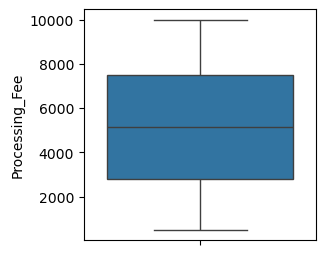

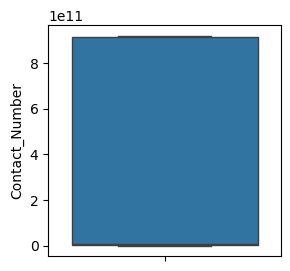

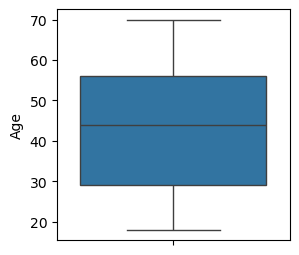

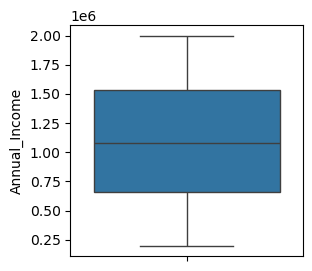

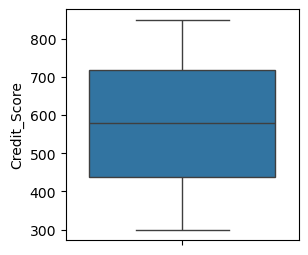

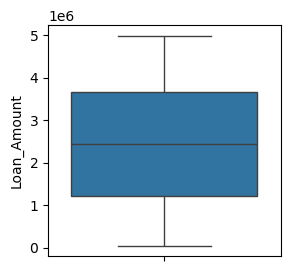

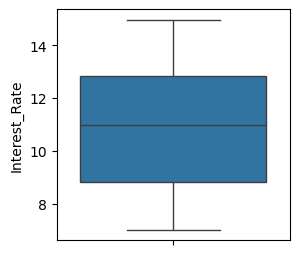

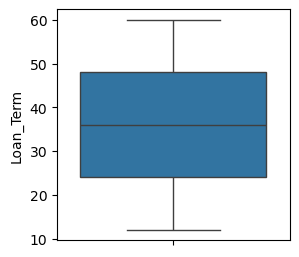

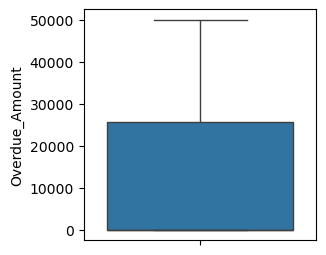

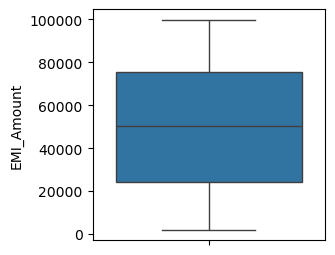

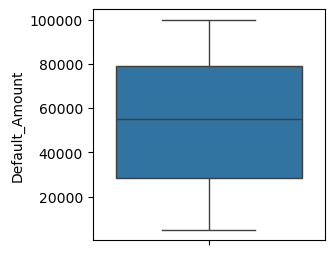

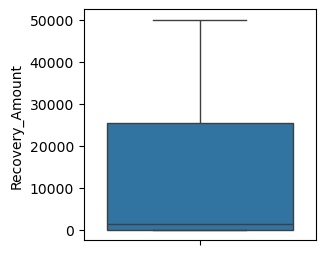

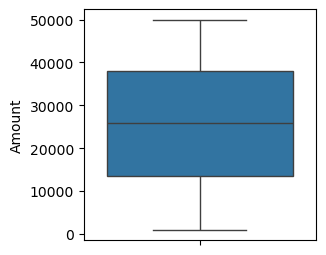

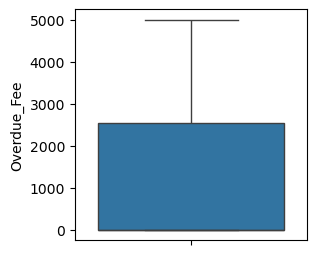

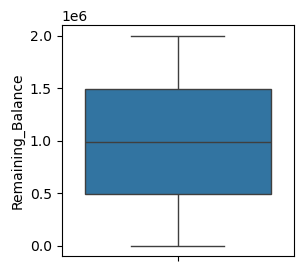

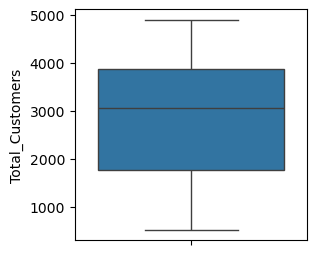

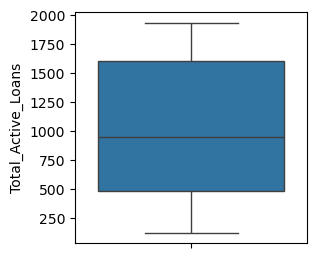

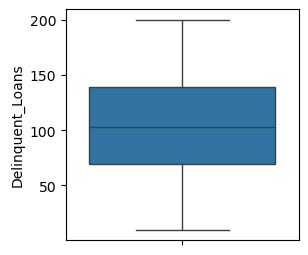

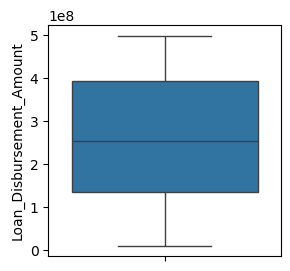

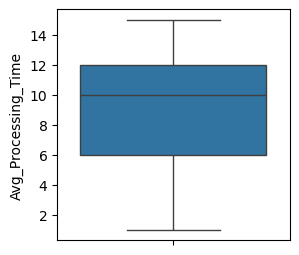

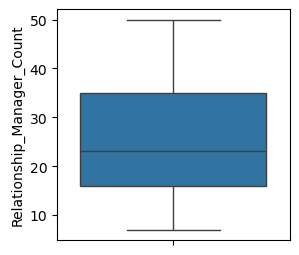

In [41]:
for i in df.select_dtypes(['int64','float64']):
    plt.figure(figsize=(3,3))
    sns.boxplot(y=i,data=df)
    plt.show()

In [31]:
#Step 4: outlier treatment
def remover_outlier(df,numeric_columns):
    df_out = df.copy()
    for column in numeric_columns:
        Q1=df[column].quantile(.25)
        Q3=df[column].quantile(.75)
        IQR=Q3-Q1
        lower_bound=Q1-(1.5*IQR)
        upper_bound=Q3+(1.5*IQR)
        df_out = df_out[(df_out[column] >= lower_bound) & (df_out[column] <= upper_bound)]
        return df_out

In [33]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns
datetime_cols = df.select_dtypes(include=['datetime64']).columns

In [57]:
columns

NameError: name 'columns' is not defined

In [35]:
#Removing Outliers
df_clean=remover_outlier(df,numeric_cols)

In [37]:
#Keeping Integers objects and Datetime
df_clean = df_clean[list(numeric_cols) + list(categorical_cols) + list(datetime_cols)]  # Keep both numeric + categorical and datetime

In [39]:
print(df_clean.dtypes)

Processing_Fee                  int64
Contact_Number                  int64
Age                             int64
Annual_Income                   int64
Credit_Score                    int64
Loan_Amount                     int64
Interest_Rate                 float64
Loan_Term                       int64
Overdue_Amount                  int64
EMI_Amount                      int64
Default_Amount                  int64
Recovery_Amount                 int64
Amount                          int64
Overdue_Fee                     int64
Remaining_Balance               int64
Total_Customers                 int64
Total_Active_Loans              int64
Delinquent_Loans                int64
Loan_Disbursement_Amount        int64
Avg_Processing_Time             int64
Relationship_Manager_Count      int64
Application_ID                 object
Loan_ID_x                      object
Customer_ID_x                  object
Application_Date               object
Approval_Date                  object
Loan_Purpose

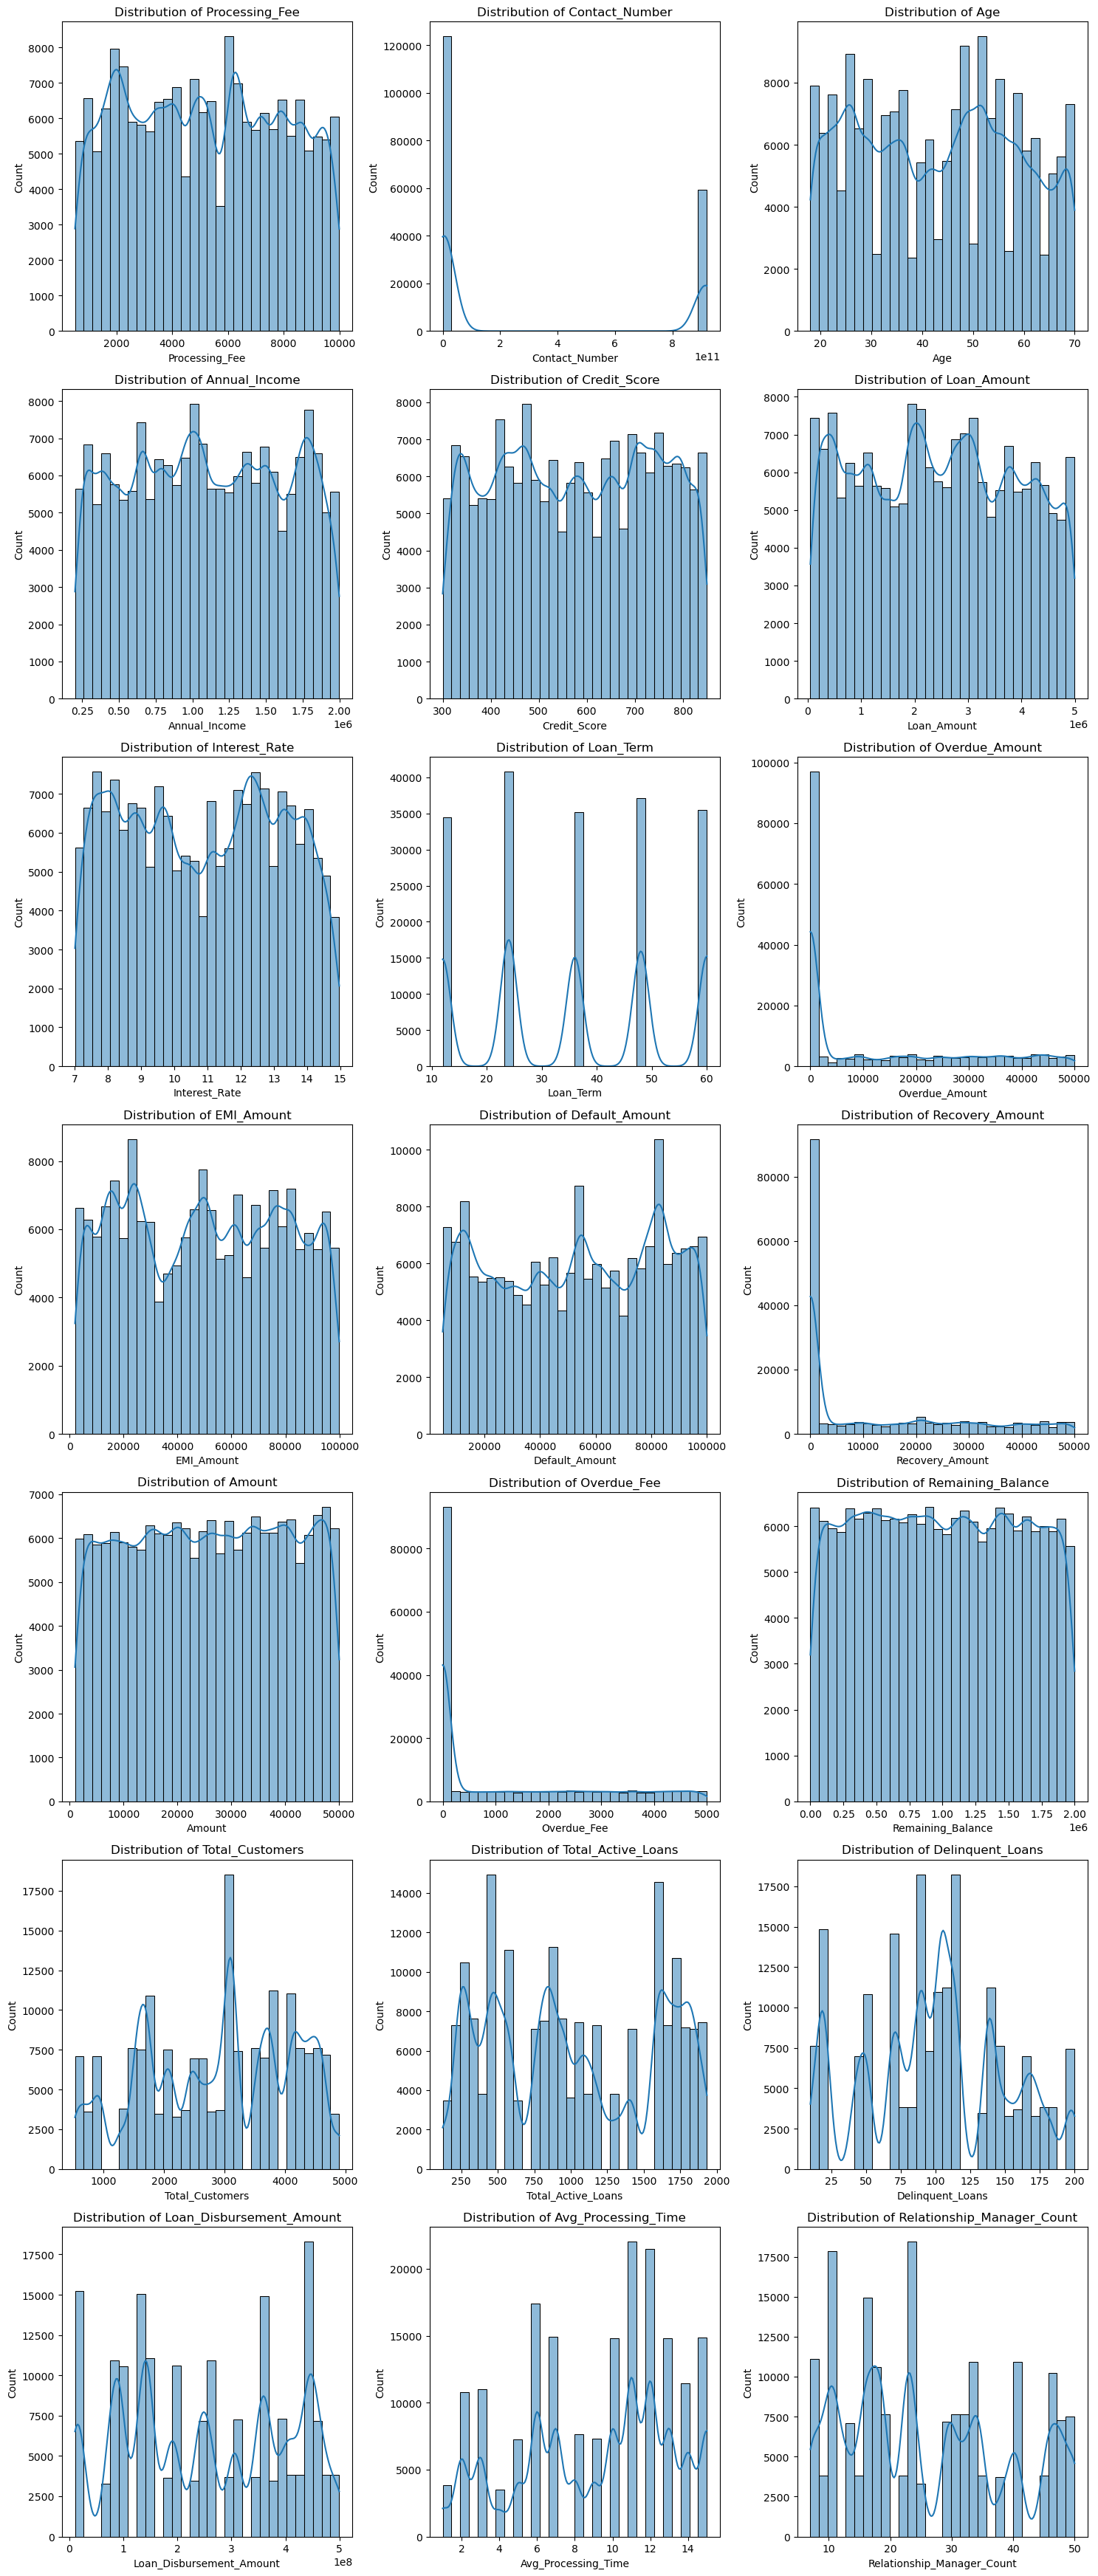

In [120]:
#Task2: Distribution of Loan_Amount, EMI_Amount, and Credit_Score
import math

# Number of numeric columns
num_cols = len(numeric_cols)

# Calculate rows and columns dynamically
num_rows = math.ceil(num_cols / 3)  # 3 columns per row

plt.figure(figsize=(15, 5 * num_rows))  # Adjust figure size dynamically

for i, col in enumerate(numeric_cols):
    plt.subplot(num_rows, 3, i + 1)  # Adjust rows automatically
    sns.histplot(df_clean[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

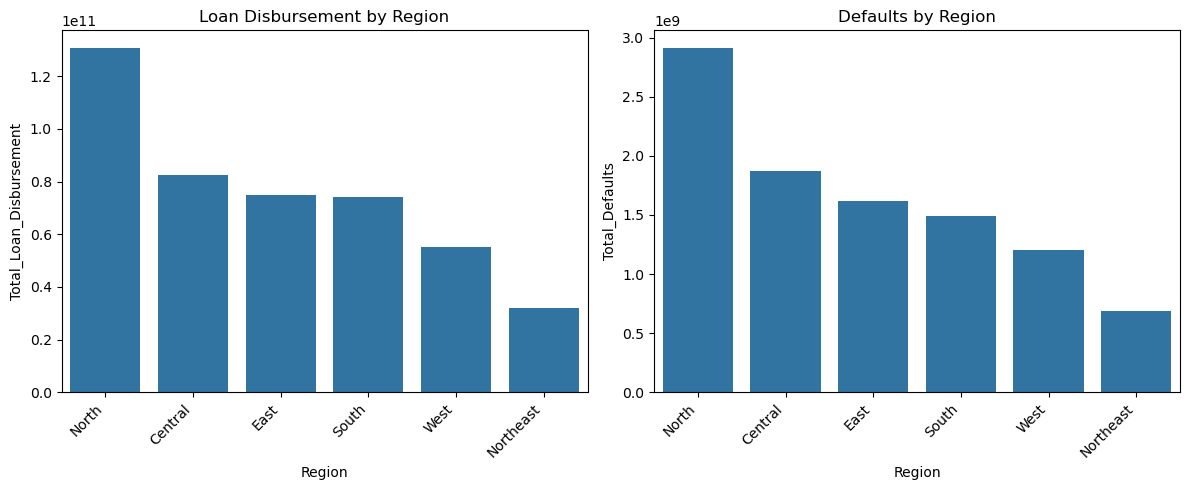

In [94]:
#Step2: Regional trends in loan disbursement and defaults.
# Aggregate loan disbursement and defaults by region
regional_analysis = df.groupby('Region').agg(
    Total_Loan_Disbursement=('Loan_Amount', 'sum'),
    Total_Defaults=('Default_Amount', 'sum')
).reset_index()

# Ensure regions exist and sort data
regional_analysis = regional_analysis.sort_values(by='Total_Loan_Disbursement', ascending=False)

# Visualizing loan disbursement vs. defaults
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Loan Disbursement Plot
sns.barplot(x='Region', y='Total_Loan_Disbursement', data=regional_analysis, ax=ax[0])
ax[0].set_title("Loan Disbursement by Region")
ax[0].set_xticks(range(len(regional_analysis['Region'])))  # Set fixed tick positions
ax[0].set_xticklabels(regional_analysis['Region'], rotation=45, ha="right")

# Defaults Plot
sns.barplot(x='Region', y='Total_Defaults', data=regional_analysis, ax=ax[1])
ax[1].set_title("Defaults by Region")
ax[1].set_xticks(range(len(regional_analysis['Region'])))  # Set fixed tick positions
ax[1].set_xticklabels(regional_analysis['Region'], rotation=45, ha="right")

plt.tight_layout()
plt.show()

In [160]:
# Step3: Monthly Trends
# Convert Application_Date and Default_Date to datetime format
df_clean['Application_Date'] = pd.to_datetime(df_clean['Application_Date'], errors='coerce')
df_clean['Default_Date'] = pd.to_datetime(df_clean['Default_Date'], errors='coerce')

# Extract Month-Year for grouping
df_clean['Month_Year'] = df_clean['Application_Date'].dt.to_period('M')

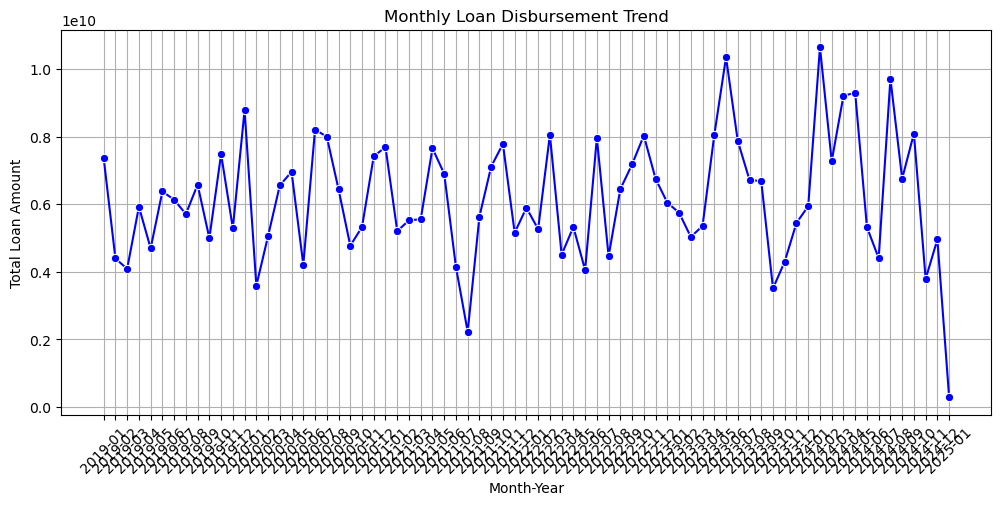

In [162]:
# Aggregate total loan disbursement per month
monthly_disbursement = df_clean.groupby('Month_Year').agg(
    Total_Loans=('Loan_Amount', 'sum')
).reset_index()

# Convert Month_Year to string for visualization
monthly_disbursement['Month_Year'] = monthly_disbursement['Month_Year'].astype(str)

# Plot the trend
plt.figure(figsize=(12, 5))
sns.lineplot(x='Month_Year', y='Total_Loans', data=monthly_disbursement, marker="o", color='blue')
plt.xticks(rotation=45)
plt.title("Monthly Loan Disbursement Trend")
plt.xlabel("Month-Year")
plt.ylabel("Total Loan Amount")
plt.grid(True)
plt.show()

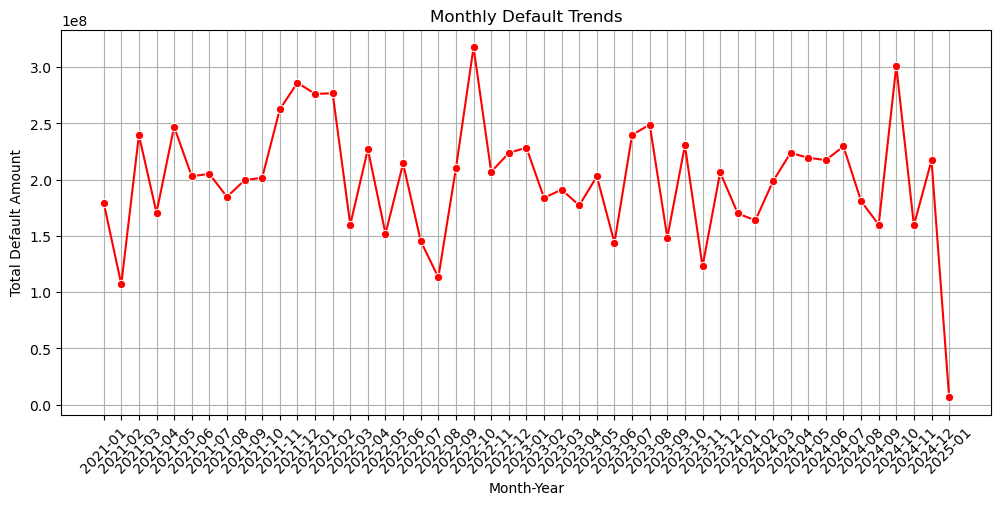

In [164]:
# Extract Month-Year for defaults
df_clean['Default_Month_Year'] = df_clean['Default_Date'].dt.to_period('M')

# Aggregate total defaults per month
monthly_defaults = df_clean.groupby('Default_Month_Year').agg(
    Total_Defaults=('Default_Amount', 'sum')
).reset_index()

# Convert Month_Year to string for visualization
monthly_defaults['Default_Month_Year'] = monthly_defaults['Default_Month_Year'].astype(str)

# Plot the trend
plt.figure(figsize=(12, 5))
sns.lineplot(x='Default_Month_Year', y='Total_Defaults', data=monthly_defaults, marker="o", color='red')
plt.xticks(rotation=45)
plt.title("Monthly Default Trends")
plt.xlabel("Month-Year")
plt.ylabel("Total Default Amount")
plt.grid(True)
plt.show()

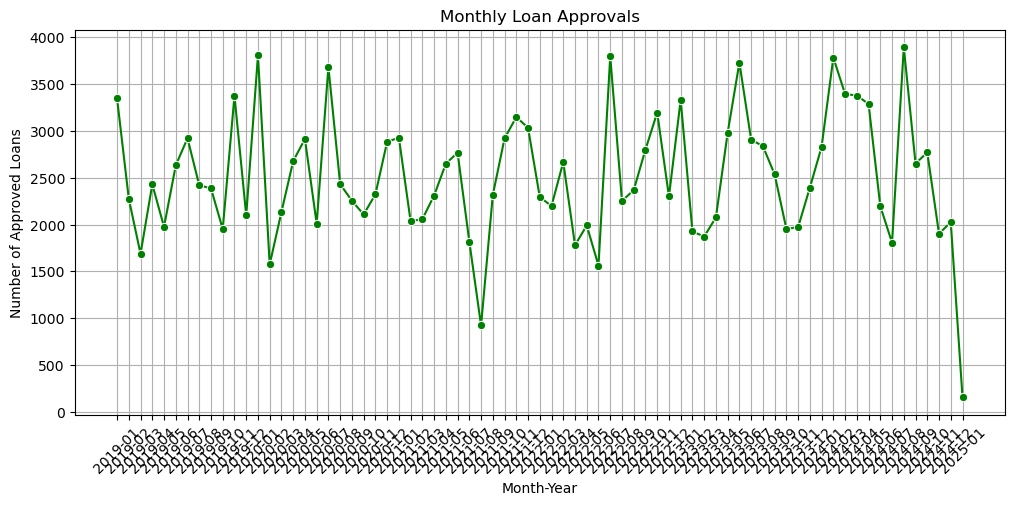

In [168]:
# Count loan approvals per month
monthly_approvals = df_clean[df_clean['Approval_Status'] == 'Approved'].groupby('Month_Year').agg(
    Approved_Loans=('Loan_ID_x', 'count')
).reset_index()

# Convert Month_Year to string
monthly_approvals['Month_Year'] = monthly_approvals['Month_Year'].astype(str)

# Plot approvals trend
plt.figure(figsize=(12, 5))
sns.lineplot(x='Month_Year', y='Approved_Loans', data=monthly_approvals, marker="o", color='green')
plt.xticks(rotation=45)
plt.title("Monthly Loan Approvals")
plt.xlabel("Month-Year")
plt.ylabel("Number of Approved Loans")
plt.grid(True)
plt.show()

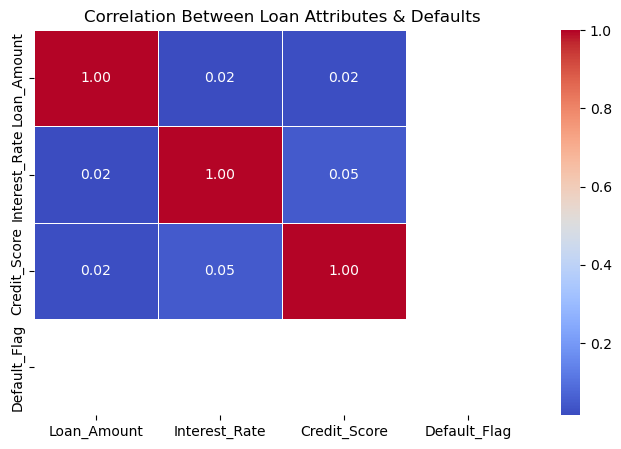

In [170]:
#Task 3: Default Risk Analysis
# Create a Default Flag (1 = Defaulted, 0 = Not Defaulted)
df_clean['Default_Flag'] = df_clean['Default_Amount'].apply(lambda x: 1 if x > 0 else 0)

# Select relevant columns for correlation analysis
corr_columns = ['Loan_Amount', 'Interest_Rate', 'Credit_Score', 'Default_Flag']

# Compute correlation
correlation_matrix = df_clean[corr_columns].corr()

# Visualize correlation matrix
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Between Loan Attributes & Defaults")
plt.show()

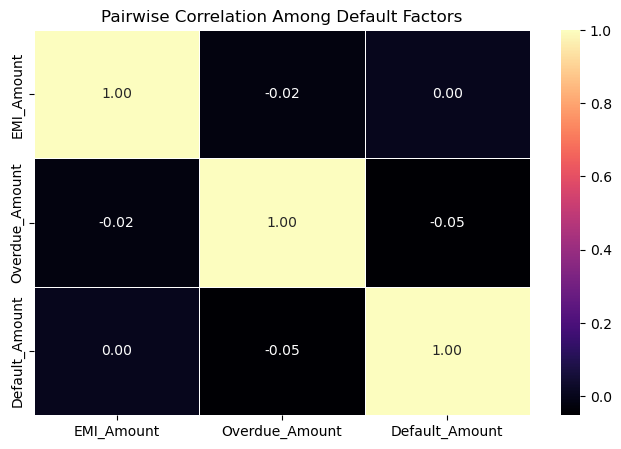

In [172]:
# Select default-related columns
default_corr_columns = ['EMI_Amount', 'Overdue_Amount', 'Default_Amount']

# Compute correlation
default_corr_matrix = df_clean[default_corr_columns].corr()

# Heatmap for default-related variables
plt.figure(figsize=(8, 5))
sns.heatmap(default_corr_matrix, annot=True, cmap='magma', fmt=".2f", linewidths=0.5)
plt.title("Pairwise Correlation Among Default Factors")
plt.show()

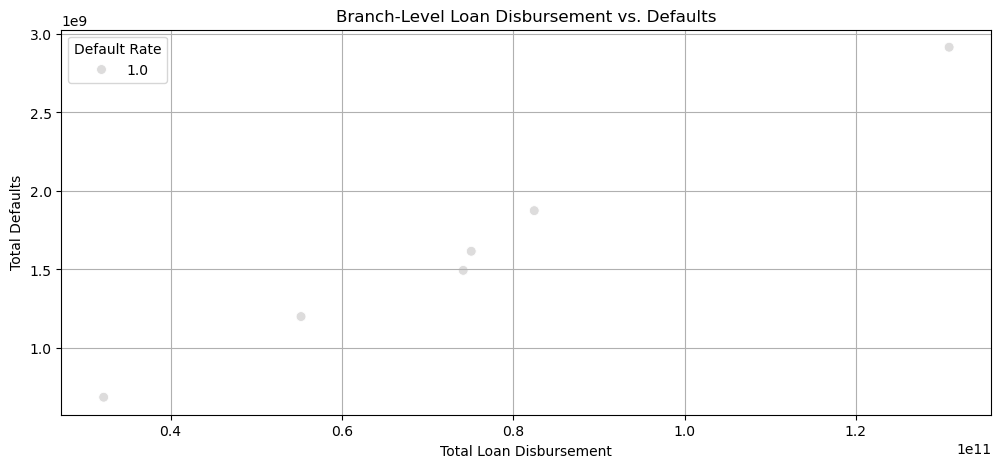

In [174]:
# Aggregate data by Region
branch_default_analysis = df_clean.groupby('Region').agg(
    Total_Loan_Disbursement=('Loan_Amount', 'sum'),
    Total_Defaults=('Default_Amount', 'sum'),
    Default_Rate=('Default_Flag', 'mean')  # Average default rate per region
).reset_index()

# Visualize default trends per region
plt.figure(figsize=(12, 5))

# Loan Disbursement vs. Defaults
sns.scatterplot(x='Total_Loan_Disbursement', y='Total_Defaults', size='Default_Rate', data=branch_default_analysis, hue='Default_Rate', palette='coolwarm', sizes=(50, 300))
plt.xlabel("Total Loan Disbursement")
plt.ylabel("Total Defaults")
plt.title("Branch-Level Loan Disbursement vs. Defaults")
plt.legend(title="Default Rate", loc='upper left')
plt.grid(True)
plt.show()

In [176]:
# Task 4: Branch and Regional Performance
# Aggregate branch-level metrics
branch_performance = df_clean.groupby('Region').agg(
    Total_Loan_Disbursement=('Loan_Amount', 'sum'),
    Avg_Processing_Time=('Application_Date', lambda x: (x.max() - x.min()).days / len(x)),  
    Default_Rate=('Default_Flag', 'mean'),  # Avg default rate per region
    Recovery_Rate=('Recovery_Amount', lambda x: x.sum() / df_clean['Default_Amount'].sum())  
).reset_index()

# Sort branches by Loan Disbursement
branch_performance = branch_performance.sort_values(by='Total_Loan_Disbursement', ascending=False)

# Display the top 5 performing branches
print(branch_performance.head())

    Region  Total_Loan_Disbursement  Avg_Processing_Time  Default_Rate  \
2    North             130895546502             0.040867           1.0   
0  Central              82452717460             0.062356           1.0   
1     East              75095915080             0.071818           1.0   
4    South              74156997192             0.075462           1.0   
5     West              55221946710             0.098495           1.0   

   Recovery_Rate  
2       0.072779  
0       0.048334  
1       0.036821  
4       0.037253  
5       0.029641  


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18468\1710881491.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, ha="right")
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18468\1710881491.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, ha="right")


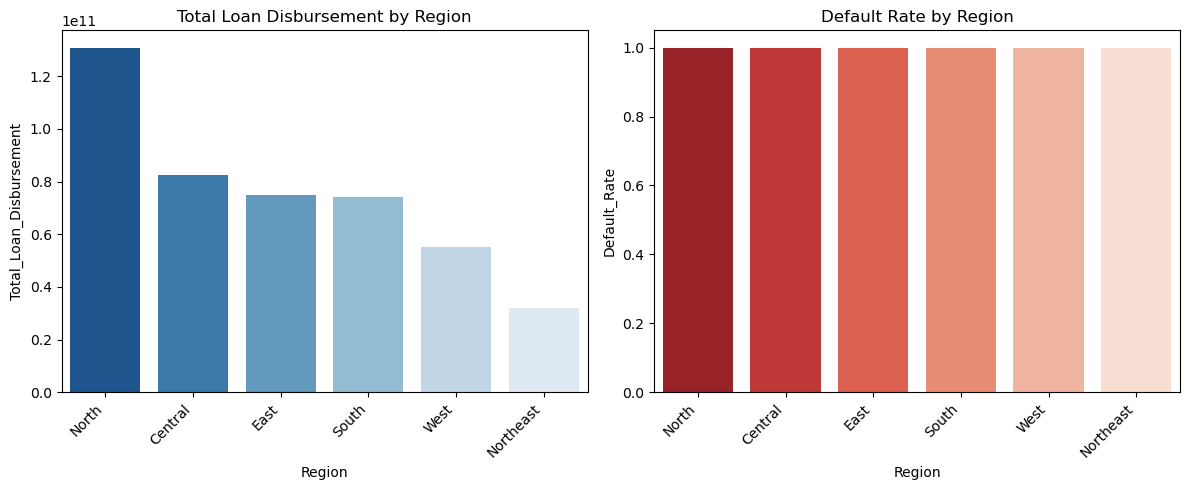

In [180]:
# Loan Disbursement & Default Rate by Region
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Loan Disbursement Bar Plot
sns.barplot(x='Region', y='Total_Loan_Disbursement', hue='Region', data=branch_performance, ax=ax[0], palette='Blues_r', legend=False)
ax[0].set_title("Total Loan Disbursement by Region")
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, ha="right")

# Default Rate Bar Plot
sns.barplot(x='Region', y='Default_Rate', hue='Region', data=branch_performance, ax=ax[1], palette='Reds_r', legend=False)
ax[1].set_title("Default Rate by Region")
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, ha="right")

plt.tight_layout()
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18468\1404820189.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=risk_distribution.index, y=risk_distribution.values, palette='coolwarm')


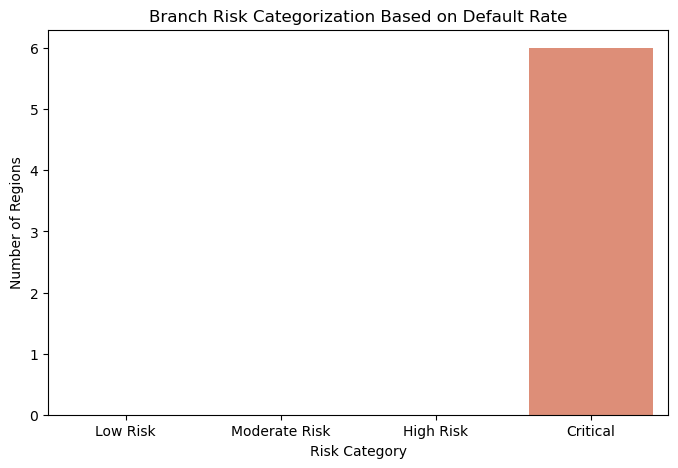

In [182]:
#Compare branch performance across regions.
# Create categories based on Default Rate
branch_performance['Risk_Category'] = pd.cut(branch_performance['Default_Rate'], 
                                             bins=[0, 0.05, 0.15, 0.30, 1], 
                                             labels=['Low Risk', 'Moderate Risk', 'High Risk', 'Critical'])

# Count regions per risk category
risk_distribution = branch_performance['Risk_Category'].value_counts()

# Plot risk categories
plt.figure(figsize=(8, 5))
sns.barplot(x=risk_distribution.index, y=risk_distribution.values, palette='coolwarm')
plt.title("Branch Risk Categorization Based on Default Rate")
plt.xlabel("Risk Category")
plt.ylabel("Number of Regions")
plt.show()

In [184]:
#Task 5: Customer Segmentation
# Define income bins and labels
income_bins = [0, 300000, 800000, np.inf]  # Adjust based on data
income_labels = ['Low', 'Medium', 'High']
df_clean['Income_Category'] = pd.cut(df_clean['Annual_Income'], bins=income_bins, labels=income_labels)

# Define credit score bins and labels
credit_bins = [0, 600, 700, 800, 900]
credit_labels = ['Poor', 'Fair', 'Good', 'Excellent']
df_clean['Credit_Category'] = pd.cut(df_clean['Credit_Score'], bins=credit_bins, labels=credit_labels)

# Verify segmentation
print(df_clean[['Annual_Income', 'Income_Category', 'Credit_Score', 'Credit_Category']].head())

     Annual_Income Income_Category  Credit_Score Credit_Category
164        1792066            High           729            Good
165        1792066            High           729            Good
166        1792066            High           729            Good
167        1792066            High           729            Good
168        1792066            High           729            Good


In [186]:
# High-risk customers: Poor Credit + High Loan Amount
high_risk_customers = df_clean[(df_clean['Credit_Category'] == 'Poor') & (df_clean['Loan_Amount'] > df_clean['Loan_Amount'].median())]

# High-value customers: Excellent Credit + High Loan Repayment
high_value_customers = df_clean[(df_clean['Credit_Category'] == 'Excellent') & (df_clean['Default_Flag'] == 0)]

print(f"High-Risk Customers: {len(high_risk_customers)}")
print(f"High-Value Customers: {len(high_value_customers)}")

High-Risk Customers: 47578
High-Value Customers: 0


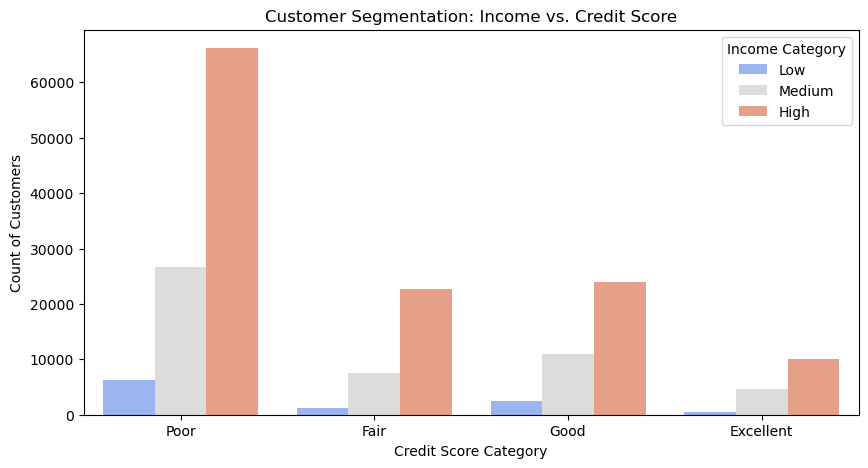

In [188]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Credit_Category', hue='Income_Category', data=df_clean, palette='coolwarm')
plt.title("Customer Segmentation: Income vs. Credit Score")
plt.xlabel("Credit Score Category")
plt.ylabel("Count of Customers")
plt.legend(title="Income Category")
plt.show()

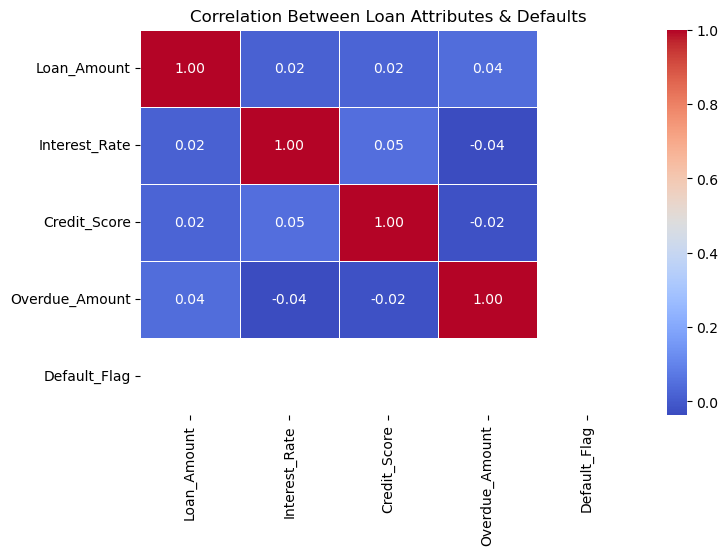

In [190]:
#6. Advanced Statistical Analysis
#1. Correlation Analysis for Default Risks
# Select key variables
default_risk_vars = ['Loan_Amount', 'Interest_Rate', 'Credit_Score', 'Overdue_Amount', 'Default_Flag']

# Compute correlation
default_risk_corr = df_clean[default_risk_vars].corr()

# Plot correlation heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(default_risk_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Between Loan Attributes & Defaults")
plt.show()

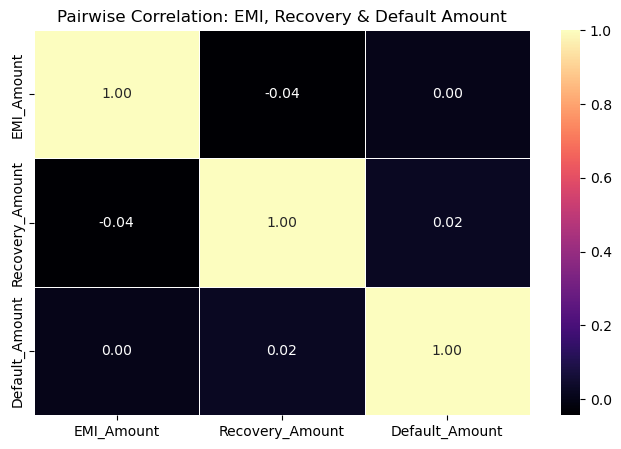

In [192]:
#Pairwise Correlation Heatmap:
# Select default-related columns
recovery_corr_vars = ['EMI_Amount', 'Recovery_Amount', 'Default_Amount']

# Compute correlation
recovery_corr_matrix = df_clean[recovery_corr_vars].corr()

# Heatmap for recovery & default relationships
plt.figure(figsize=(8, 5))
sns.heatmap(recovery_corr_matrix, annot=True, cmap='magma', fmt=".2f", linewidths=0.5)
plt.title("Pairwise Correlation: EMI, Recovery & Default Amount")
plt.show()

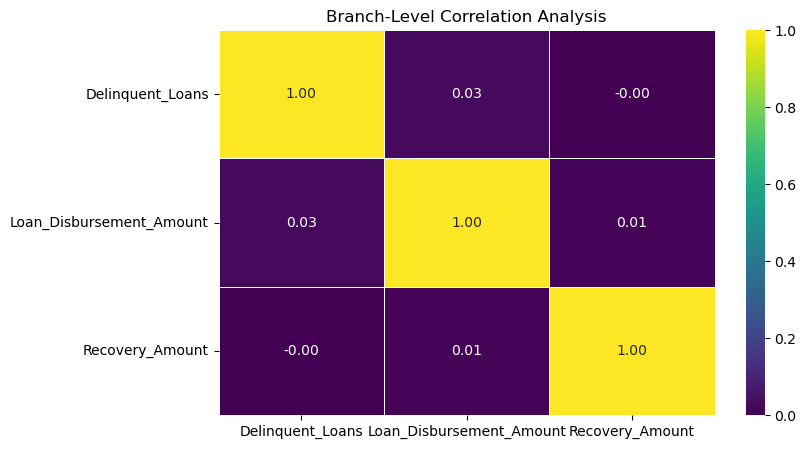

In [194]:
#Branch-Level Correlation:
# Select branch performance variables
branch_corr_vars = ['Delinquent_Loans', 'Loan_Disbursement_Amount', 'Recovery_Amount']

# Compute correlation at the branch level
branch_corr_matrix = df_clean[branch_corr_vars].corr()

# Visualizing Branch-Level Correlations
plt.figure(figsize=(8, 5))
sns.heatmap(branch_corr_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=0.5)
plt.title("Branch-Level Correlation Analysis")
plt.show()

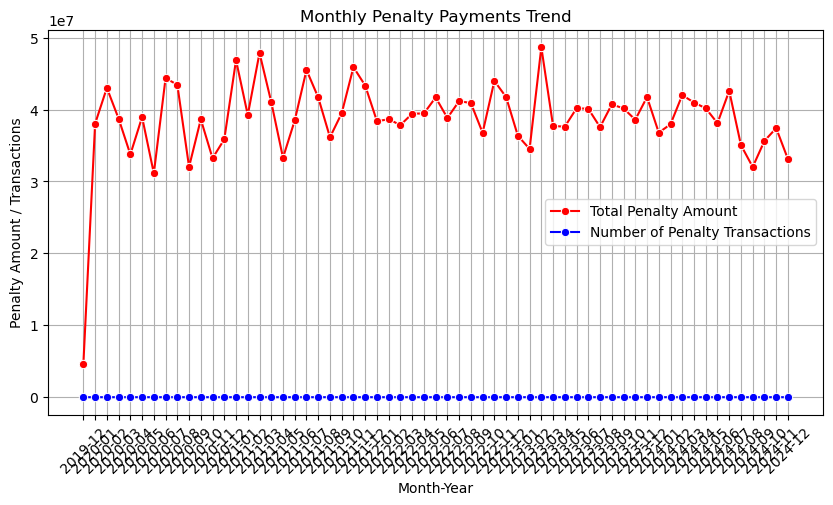

In [200]:
#Task 7. Transaction and Recovery Analysis
# Convert Transaction_Date to datetime
df_clean['Transaction_Date'] = pd.to_datetime(df_clean['Transaction_Date'], errors='coerce')

# Filter by 'Penalty' under the correct column: Payment_Type
penalty_trends = df_clean[df_clean['Payment_Type'] == 'Penalty'].groupby(df_clean['Transaction_Date'].dt.to_period('M')).agg(
    Total_Penalty_Amount=('Amount', 'sum'),  # Changed Transaction_Amount → Amount
    Penalty_Transactions=('Transaction_ID', 'count')
).reset_index()

# Convert period to string for plotting
penalty_trends['Transaction_Date'] = penalty_trends['Transaction_Date'].astype(str)

# Plot penalty trends
plt.figure(figsize=(10, 5))
sns.lineplot(x='Transaction_Date', y='Total_Penalty_Amount', data=penalty_trends, marker="o", color='red', label="Total Penalty Amount")
sns.lineplot(x='Transaction_Date', y='Penalty_Transactions', data=penalty_trends, marker="o", color='blue', label="Number of Penalty Transactions")
plt.xticks(rotation=45)
plt.title("Monthly Penalty Payments Trend")
plt.xlabel("Month-Year")
plt.ylabel("Penalty Amount / Transactions")
plt.legend()
plt.grid(True)
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18468\3556143950.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Region', y='Recovery_Rate', data=region_recovery, palette='Greens_r')


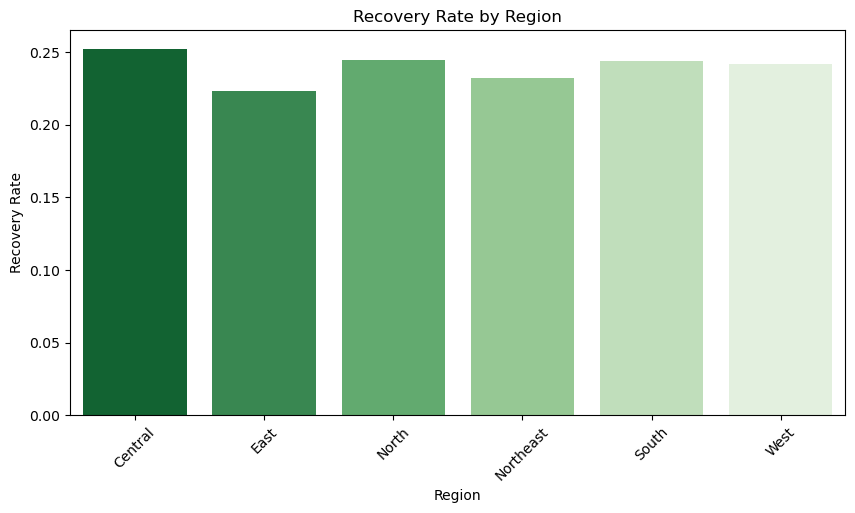

In [204]:
# Aggregate recovery performance per region
region_recovery = df_clean.groupby('Region').agg(
    Total_Defaults=('Default_Amount', 'sum'),
    Total_Recovered=('Recovery_Amount', 'sum')
).reset_index()

# Calculate Recovery Rate per region
region_recovery['Recovery_Rate'] = region_recovery['Total_Recovered'] / region_recovery['Total_Defaults']

# Plot Recovery Rate by Region
plt.figure(figsize=(10, 5))
sns.barplot(x='Region', y='Recovery_Rate', data=region_recovery, palette='Greens_r')
plt.title("Recovery Rate by Region")
plt.xlabel("Region")
plt.ylabel("Recovery Rate")
plt.xticks(rotation=45)
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18468\3705166462.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  emi_default_rate = df_clean.groupby('EMI_Category').agg(
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18468\3705166462.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='EMI_Category', y='Default_Rate', data=emi_default_rate, palette='Reds_r')


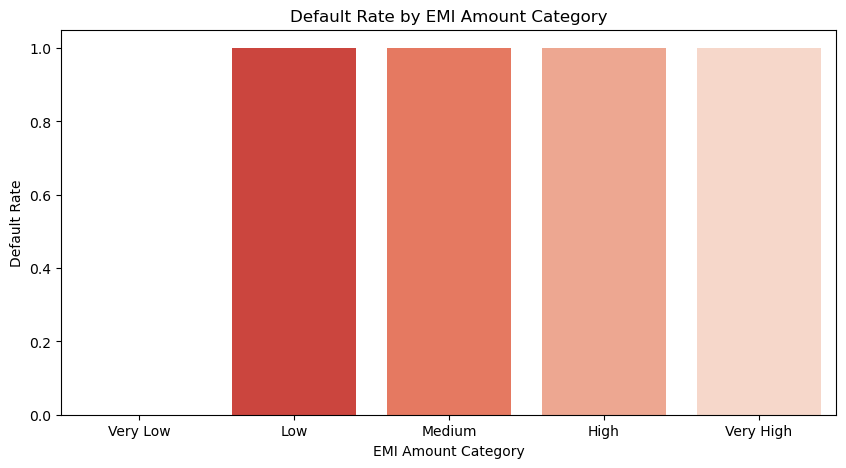

In [206]:
#Task 8: EMI Analysis
# Step 1: EMI Amount vs. Default Probability
# Categorize EMI Amount into bins
emi_bins = [0, 2000, 5000, 10000, 20000, np.inf]
emi_labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']
df_clean['EMI_Category'] = pd.cut(df_clean['EMI_Amount'], bins=emi_bins, labels=emi_labels)

# Calculate default rate per EMI category
emi_default_rate = df_clean.groupby('EMI_Category').agg(
    Total_Customers=('Customer_ID_x', 'count'),
    Defaulters=('Default_Flag', 'sum')
).reset_index()

# Compute default rate
emi_default_rate['Default_Rate'] = emi_default_rate['Defaulters'] / emi_default_rate['Total_Customers']

# Plot default rates by EMI category
plt.figure(figsize=(10, 5))
sns.barplot(x='EMI_Category', y='Default_Rate', data=emi_default_rate, palette='Reds_r')
plt.title("Default Rate by EMI Amount Category")
plt.xlabel("EMI Amount Category")
plt.ylabel("Default Rate")
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18468\893329111.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  emi_threshold_analysis = df_clean.groupby(pd.qcut(df_clean['EMI_Amount'], q=10)).agg(


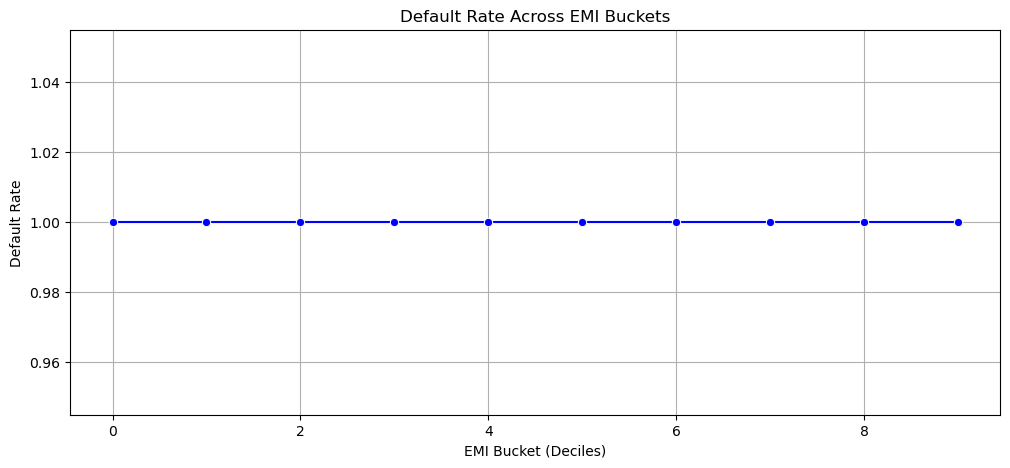

In [208]:
# Step 2: Identify EMI Thresholds for High Default Risk
# Find EMI amount at which defaults significantly increase
emi_threshold_analysis = df_clean.groupby(pd.qcut(df_clean['EMI_Amount'], q=10)).agg(
    Total_Customers=('Customer_ID_x', 'count'),
    Defaulters=('Default_Flag', 'sum')
).reset_index()

# Compute default rate per EMI bucket
emi_threshold_analysis['Default_Rate'] = emi_threshold_analysis['Defaulters'] / emi_threshold_analysis['Total_Customers']

# Plot default rate trend
plt.figure(figsize=(12, 5))
sns.lineplot(x=emi_threshold_analysis.index, y=emi_threshold_analysis['Default_Rate'], marker="o", color='blue')
plt.title("Default Rate Across EMI Buckets")
plt.xlabel("EMI Bucket (Deciles)")
plt.ylabel("Default Rate")
plt.grid(True)
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18468\2600989276.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  emi_default_rate = df_clean.groupby('EMI_Category').agg(
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18468\2600989276.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='EMI_Category', y='Default_Rate', data=emi_default_rate, palette='Reds_r')


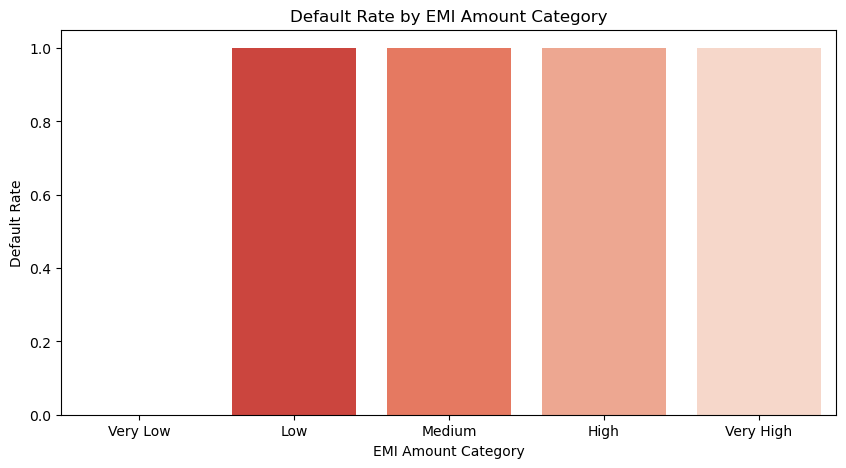

In [212]:
# Categorize EMI Amount into bins
emi_bins = [0, 2000, 5000, 10000, 20000, np.inf]
emi_labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']
df_clean['EMI_Category'] = pd.cut(df_clean['EMI_Amount'], bins=emi_bins, labels=emi_labels)

# Calculate default rate per EMI category
emi_default_rate = df_clean.groupby('EMI_Category').agg(
    Total_Customers=('Customer_ID_x', 'count'),
    Defaulters=('Default_Flag', 'sum')
).reset_index()

# Compute default rate
emi_default_rate['Default_Rate'] = emi_default_rate['Defaulters'] / emi_default_rate['Total_Customers']

# Plot default rates by EMI category
plt.figure(figsize=(10, 5))
sns.barplot(x='EMI_Category', y='Default_Rate', data=emi_default_rate, palette='Reds_r')
plt.title("Default Rate by EMI Amount Category")
plt.xlabel("EMI Amount Category")
plt.ylabel("Default Rate")
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18468\893329111.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  emi_threshold_analysis = df_clean.groupby(pd.qcut(df_clean['EMI_Amount'], q=10)).agg(


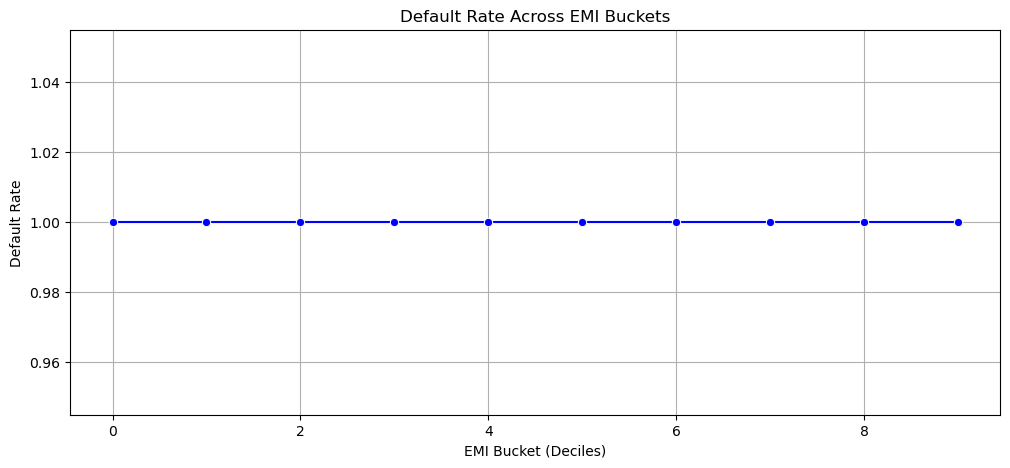

In [214]:
# Step 2: Identify EMI Thresholds for High Default Risk
# Find EMI amount at which defaults significantly increase
emi_threshold_analysis = df_clean.groupby(pd.qcut(df_clean['EMI_Amount'], q=10)).agg(
    Total_Customers=('Customer_ID_x', 'count'),
    Defaulters=('Default_Flag', 'sum')
).reset_index()

# Compute default rate per EMI bucket
emi_threshold_analysis['Default_Rate'] = emi_threshold_analysis['Defaulters'] / emi_threshold_analysis['Total_Customers']

# Plot default rate trend
plt.figure(figsize=(12, 5))
sns.lineplot(x=emi_threshold_analysis.index, y=emi_threshold_analysis['Default_Rate'], marker="o", color='blue')
plt.title("Default Rate Across EMI Buckets")
plt.xlabel("EMI Bucket (Deciles)")
plt.ylabel("Default Rate")
plt.grid(True)
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18468\4149490208.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha="right")


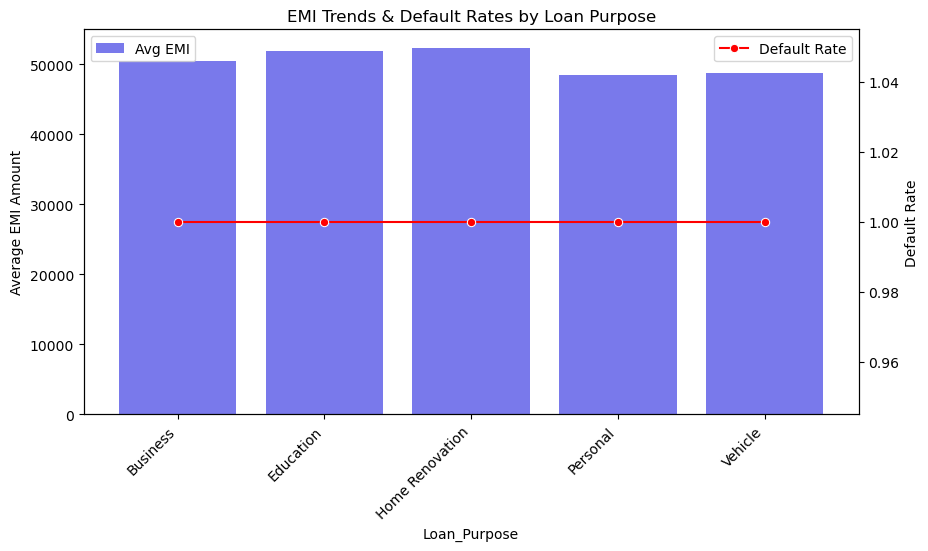

In [216]:
#Step 3: Compare EMI trends across loan types
# Compute average EMI per Loan Purpose
emi_by_loan_purpose = df_clean.groupby('Loan_Purpose').agg(
    Avg_EMI=('EMI_Amount', 'mean'),
    Default_Rate=('Default_Flag', 'mean')
).reset_index()

# Plot EMI vs. Default Rate by Loan Purpose
fig, ax1 = plt.subplots(figsize=(10, 5))

sns.barplot(x='Loan_Purpose', y='Avg_EMI', data=emi_by_loan_purpose, ax=ax1, color='blue', alpha=0.6, label="Avg EMI")
ax1.set_ylabel("Average EMI Amount")
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha="right")

# Create a secondary y-axis for Default Rate
ax2 = ax1.twinx()
sns.lineplot(x='Loan_Purpose', y='Default_Rate', data=emi_by_loan_purpose, ax=ax2, marker="o", color='red', label="Default Rate")
ax2.set_ylabel("Default Rate")

# Add legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.title("EMI Trends & Default Rates by Loan Purpose")
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18468\2406672885.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=application_status.index, y=application_status.values, palette=['green', 'red'])
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18468\2406672885.py:6: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.barplot(x=application_status.index, y=application_status.values, palette=['green', 'red'])


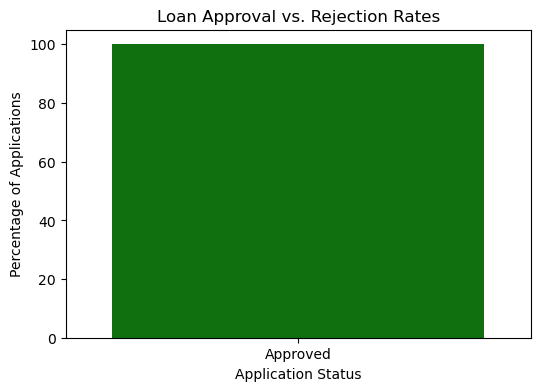

Approval_Status
Approved    100.0
Name: proportion, dtype: float64


In [218]:
#Task 9: Loan Application Insights
# 1. Calculate Approval & Rejection Rates
# Count total applications, approvals, and rejections
application_status = df_clean['Approval_Status'].value_counts(normalize=True) * 100

# Plot Approval & Rejection Rates
plt.figure(figsize=(6, 4))
sns.barplot(x=application_status.index, y=application_status.values, palette=['green', 'red'])
plt.title("Loan Approval vs. Rejection Rates")
plt.xlabel("Application Status")
plt.ylabel("Percentage of Applications")
plt.show()

# Print approval rates
print(application_status)

In [220]:
#Step 2: Identify Most Common Rejection Reasons
# Count rejection reasons
rejection_reasons = df_clean[df_clean['Approval_Status'] == 'Rejected']['Rejection_Reason'].value_counts()

# Plot rejection reasons
plt.figure(figsize=(10, 5))
sns.barplot(x=rejection_reasons.index, y=rejection_reasons.values, palette='coolwarm')
plt.xticks(rotation=45, ha="right")
plt.title("Most Common Loan Rejection Reasons")
plt.xlabel("Rejection Reason")
plt.ylabel("Number of Applications Rejected")
plt.show()

# Since we removed Rejection reasons because the rows were empty we are not seeing any results and reason for below error

KeyError: 'Rejection_Reason'

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18468\1950227406.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Approval_Status', y='Processing_Fee', data=processing_fee_comparison, palette=['green', 'red'])
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18468\1950227406.py:7: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.barplot(x='Approval_Status', y='Processing_Fee', data=processing_fee_comparison, palette=['green', 'red'])


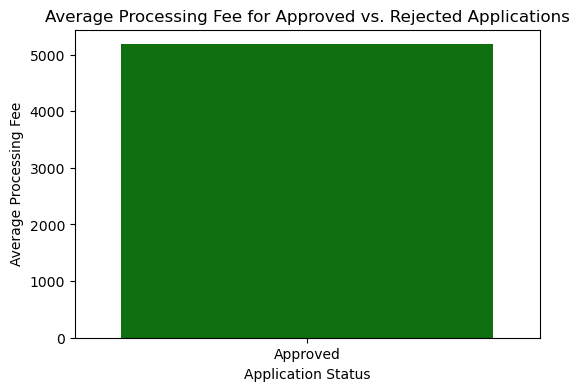

  Approval_Status  Processing_Fee
0        Approved     5181.132845


In [222]:
# Step 3: Compare Processing Fees for Approved vs. Rejected Applications
# Compute average processing fee by application status
processing_fee_comparison = df_clean.groupby('Approval_Status')['Processing_Fee'].mean().reset_index()

# Plot processing fees
plt.figure(figsize=(6, 4))
sns.barplot(x='Approval_Status', y='Processing_Fee', data=processing_fee_comparison, palette=['green', 'red'])
plt.title("Average Processing Fee for Approved vs. Rejected Applications")
plt.xlabel("Application Status")
plt.ylabel("Average Processing Fee")
plt.show()

# Print processing fee comparison
print(processing_fee_comparison)

In [224]:
#Task10: Recovery Effectiveness
#Step 1: Calculate Overall Recovery Rate
# Compute total default amount and recovered amount
total_defaults = df_clean['Default_Amount'].sum()
total_recovered = df_clean['Recovery_Amount'].sum()

# Compute recovery rate
overall_recovery_rate = total_recovered / total_defaults

print(f"Overall Recovery Rate: {overall_recovery_rate:.2%}")

Overall Recovery Rate: 24.11%


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18468\262983836.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Legal_Action', y='Recovery_Rate', data=recovery_legal_action, palette='coolwarm')


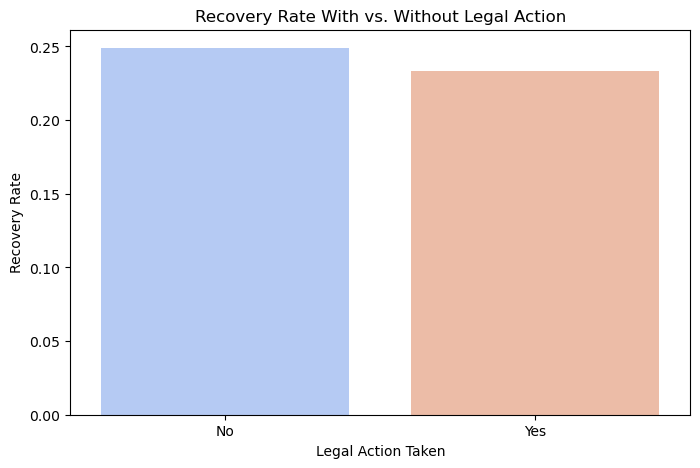

In [226]:
#Step 2: Recovery Rates for Defaults With & Without Legal Action
# Compute recovery effectiveness based on legal action
recovery_legal_action = df_clean.groupby('Legal_Action').agg(
    Total_Defaults=('Default_Amount', 'sum'),
    Total_Recovered=('Recovery_Amount', 'sum')
).reset_index()

# Calculate Recovery Rate
recovery_legal_action['Recovery_Rate'] = recovery_legal_action['Total_Recovered'] / recovery_legal_action['Total_Defaults']

# Plot recovery effectiveness
plt.figure(figsize=(8, 5))
sns.barplot(x='Legal_Action', y='Recovery_Rate', data=recovery_legal_action, palette='coolwarm')
plt.title("Recovery Rate With vs. Without Legal Action")
plt.xlabel("Legal Action Taken")
plt.ylabel("Recovery Rate")
plt.show()

In [228]:
print(recovery_legal_action)

  Legal_Action  Total_Defaults  Total_Recovered  Recovery_Rate
0           No      4917677722       1224186320       0.248936
1          Yes      4866970184       1135050652       0.233215


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18468\2366624614.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Region', y='Recovery_Rate', data=branch_recovery, palette='Greens_r')


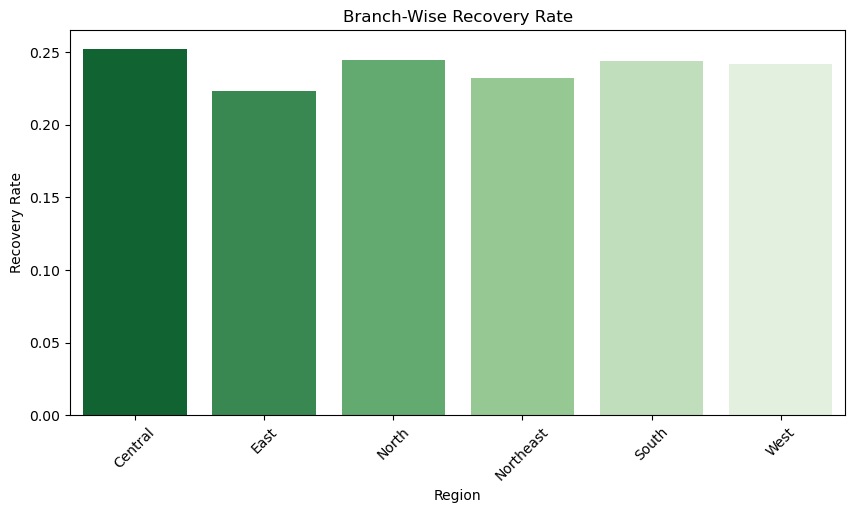

In [230]:
#Step 3: Branch-Wise Recovery Performance
# Compute recovery performance per branch
branch_recovery = df_clean.groupby('Region').agg(
    Total_Defaults=('Default_Amount', 'sum'),
    Total_Recovered=('Recovery_Amount', 'sum')
).reset_index()

# Compute recovery rate per branch
branch_recovery['Recovery_Rate'] = branch_recovery['Total_Recovered'] / branch_recovery['Total_Defaults']

# Plot branch-wise recovery performance
plt.figure(figsize=(10, 5))
sns.barplot(x='Region', y='Recovery_Rate', data=branch_recovery, palette='Greens_r')
plt.title("Branch-Wise Recovery Rate")
plt.xlabel("Region")
plt.ylabel("Recovery Rate")
plt.xticks(rotation=45)
plt.show()

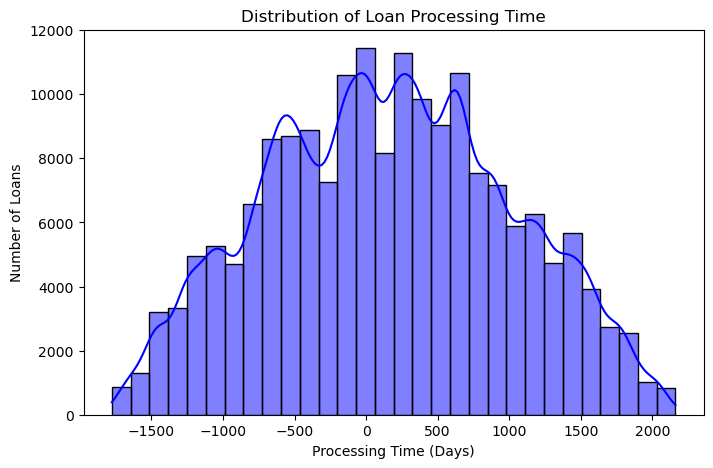

In [234]:
#Task 11: Loan Disbursement Efficiency
#Step 1: Analyze Time from Application to Disbursement
# Convert dates to datetime format
df_clean['Application_Date'] = pd.to_datetime(df_clean['Application_Date'], errors='coerce')
df_clean['Disbursal_Date'] = pd.to_datetime(df_clean['Disbursal_Date'], errors='coerce')

# Compute processing time (days between application and disbursement)
df_clean['Processing_Time'] = (df_clean['Disbursal_Date'] - df_clean['Application_Date']).dt.days

# Plot distribution of processing times
plt.figure(figsize=(8, 5))
sns.histplot(df_clean['Processing_Time'], bins=30, kde=True, color='blue')
plt.title("Distribution of Loan Processing Time")
plt.xlabel("Processing Time (Days)")
plt.ylabel("Number of Loans")
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18468\907157799.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Region', y='Avg_Processing_Time', data=branch_processing_time, palette='Blues_r')


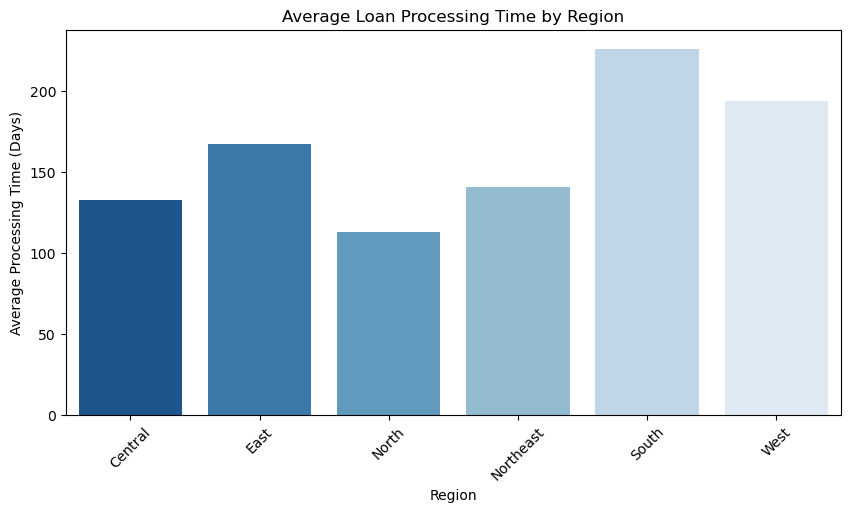

In [236]:
#Step 2: Compare Average Processing Times Across Branches
# Compute average processing time per region
branch_processing_time = df_clean.groupby('Region').agg(
    Avg_Processing_Time=('Processing_Time', 'mean')
).reset_index()

# Plot branch-wise processing efficiency
plt.figure(figsize=(10, 5))
sns.barplot(x='Region', y='Avg_Processing_Time', data=branch_processing_time, palette='Blues_r')
plt.title("Average Loan Processing Time by Region")
plt.xlabel("Region")
plt.ylabel("Average Processing Time (Days)")
plt.xticks(rotation=45)
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18468\2530258156.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Loan_Purpose', y='Avg_Processing_Time', data=loan_purpose_processing, palette='coolwarm')


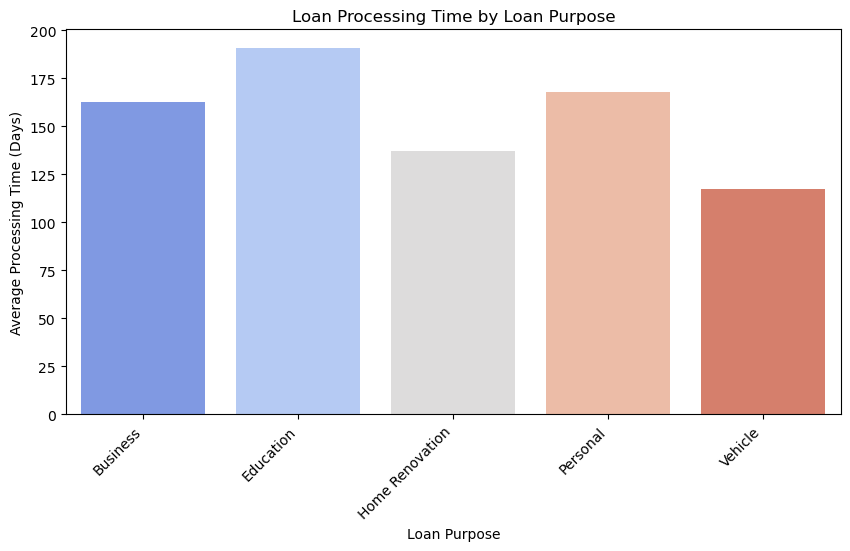

In [238]:
# Compute average processing time by loan purpose
loan_purpose_processing = df_clean.groupby('Loan_Purpose').agg(
    Avg_Processing_Time=('Processing_Time', 'mean')
).reset_index()

# Plot processing time by loan purpose
plt.figure(figsize=(10, 5))
sns.barplot(x='Loan_Purpose', y='Avg_Processing_Time', data=loan_purpose_processing, palette='coolwarm')
plt.title("Loan Processing Time by Loan Purpose")
plt.xlabel("Loan Purpose")
plt.ylabel("Average Processing Time (Days)")
plt.xticks(rotation=45, ha="right")
plt.show()

In [240]:
#Task 12: Profitability Analysis
#Step 1: Calculate Total Interest Income
# Compute total interest earned per loan
df_clean['Total_Interest_Earned'] = (df_clean['Loan_Amount'] * df_clean['Interest_Rate'] / 100) * (df_clean['Loan_Term'] / 12)

# Total interest income across all loans
total_interest_income = df_clean['Total_Interest_Earned'].sum()

print(f"Total Interest Income: ₹{total_interest_income:,.2f}")

Total Interest Income: ₹148,464,182,652.71


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18468\2320157823.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Loan_Purpose', y='Total_Interest', data=profit_by_loan_purpose, palette='coolwarm')


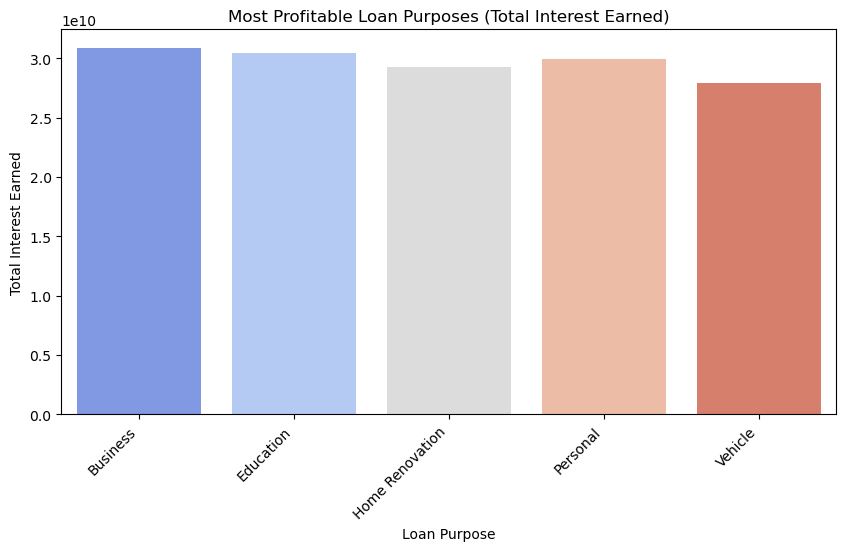

In [242]:
#Step2: Most Profitable Loan_Purposes
# Aggregate interest income by loan purpose
profit_by_loan_purpose = df_clean.groupby('Loan_Purpose').agg(
    Total_Interest=('Total_Interest_Earned', 'sum'),
    Avg_Loan_Amount=('Loan_Amount', 'mean')
).reset_index()

# Plot most profitable loan purposes
plt.figure(figsize=(10, 5))
sns.barplot(x='Loan_Purpose', y='Total_Interest', data=profit_by_loan_purpose, palette='coolwarm')
plt.title("Most Profitable Loan Purposes (Total Interest Earned)")
plt.xlabel("Loan Purpose")
plt.ylabel("Total Interest Earned")
plt.xticks(rotation=45, ha="right")
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18468\3731515097.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Region', y='Total_Interest', data=profit_by_region, palette='Greens_r')


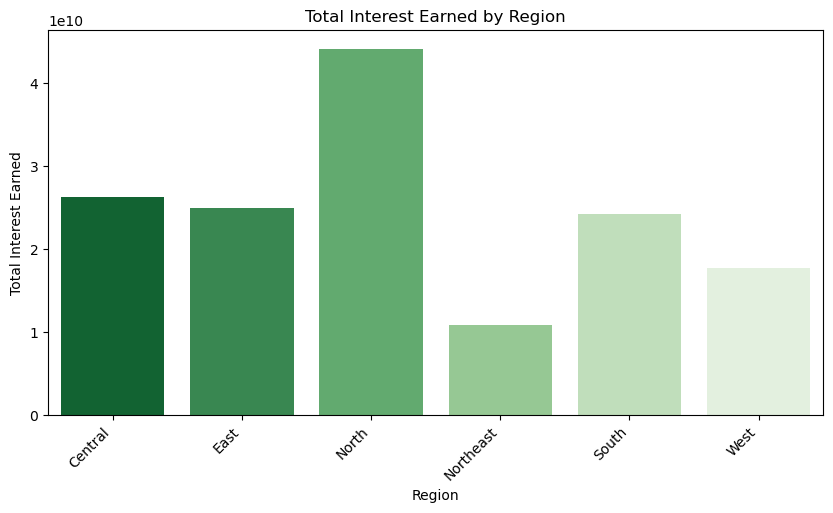

In [244]:
#Step 3: Profitability by Region
# Aggregate interest income per region
profit_by_region = df_clean.groupby('Region').agg(
    Total_Interest=('Total_Interest_Earned', 'sum')
).reset_index()

# Plot most profitable regions
plt.figure(figsize=(10, 5))
sns.barplot(x='Region', y='Total_Interest', data=profit_by_region, palette='Greens_r')
plt.title("Total Interest Earned by Region")
plt.xlabel("Region")
plt.ylabel("Total Interest Earned")
plt.xticks(rotation=45, ha="right")
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18468\3581643371.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Region', y='Total_Loan_Disbursement', data=loan_distribution, palette='Blues_r')


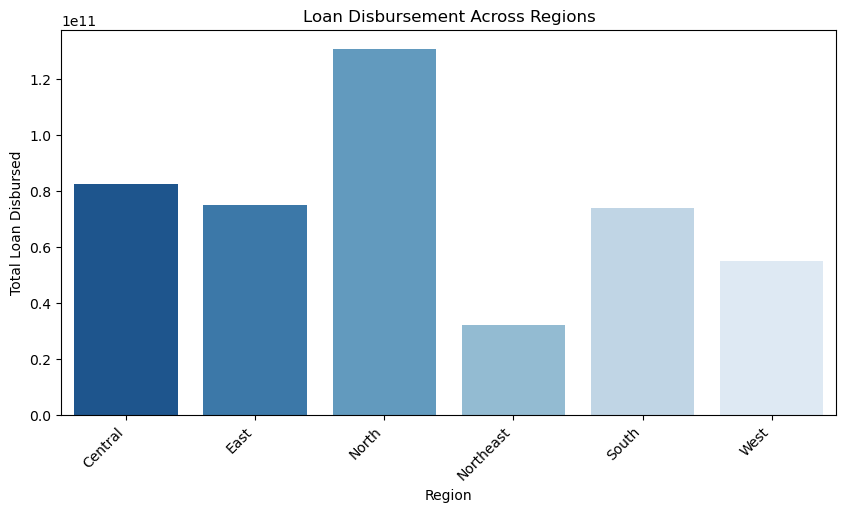

In [246]:
#Task 13: Geospatial Analysis
#Step 1: Loan Distribution Across Regions
# Aggregate total loan amount by region
loan_distribution = df_clean.groupby('Region').agg(
    Total_Loan_Disbursement=('Loan_Amount', 'sum')
).reset_index()

# Plot loan distribution across regions
plt.figure(figsize=(10, 5))
sns.barplot(x='Region', y='Total_Loan_Disbursement', data=loan_distribution, palette='Blues_r')
plt.title("Loan Disbursement Across Regions")
plt.xlabel("Region")
plt.ylabel("Total Loan Disbursed")
plt.xticks(rotation=45, ha="right")
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18468\805702998.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Region', y='Default_Rate', data=default_rate_by_region, palette='Reds_r')


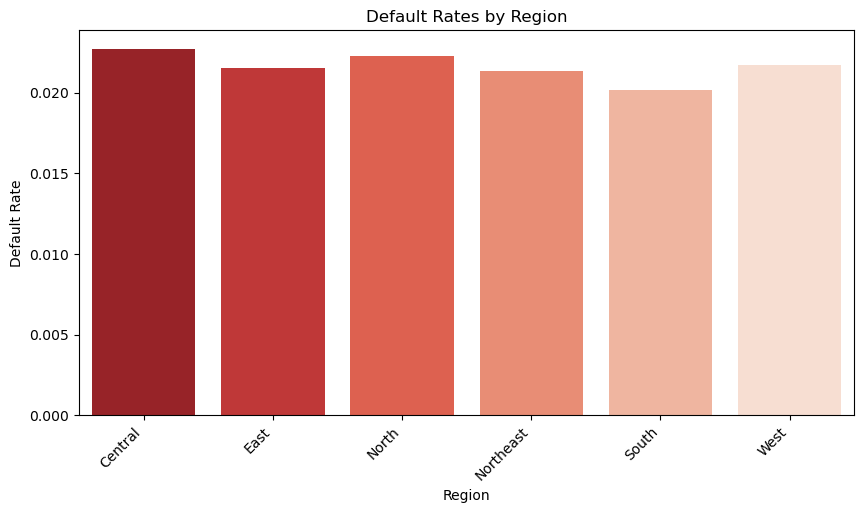

In [250]:
#Step 2: Default Rates by Region
# Aggregate default rate per region
default_rate_by_region = df_clean.groupby('Region').agg(
    Total_Defaults=('Default_Amount', 'sum'),
    Total_Loans=('Loan_Amount', 'sum')
).reset_index()

# Compute default rate
default_rate_by_region['Default_Rate'] = default_rate_by_region['Total_Defaults'] / default_rate_by_region['Total_Loans']

# Plot default rates across regions
plt.figure(figsize=(10, 5))
sns.barplot(x='Region', y='Default_Rate', data=default_rate_by_region, palette='Reds_r')
plt.title("Default Rates by Region")
plt.xlabel("Region")
plt.ylabel("Default Rate")
plt.xticks(rotation=45, ha="right")
plt.show()

In [254]:
#Step 3: Loan Disbursement Trends for Rural vs. Urban Areas
# Aggregate loan disbursement for urban vs. rural areas
#We do not have Rural or Urban breakdown in the given Dataset

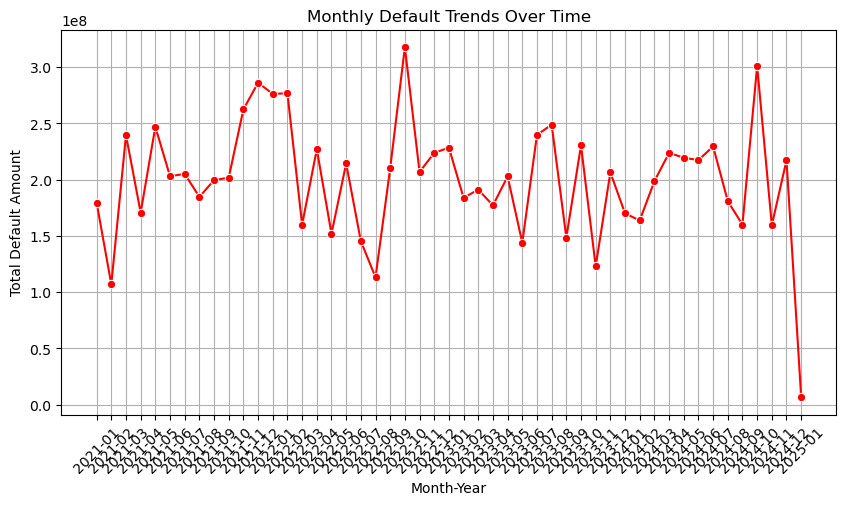

In [256]:
# Task 14: Default Trends
#Step 1: Defaults Over Time
# Convert Default_Date to datetime
df_clean['Default_Date'] = pd.to_datetime(df_clean['Default_Date'], errors='coerce')

# Aggregate defaults per month
default_trends = df_clean.groupby(df_clean['Default_Date'].dt.to_period('M')).agg(
    Total_Defaults=('Default_Amount', 'sum')
).reset_index()

# Convert period to string for plotting
default_trends['Default_Date'] = default_trends['Default_Date'].astype(str)

# Plot default trends over time
plt.figure(figsize=(10, 5))
sns.lineplot(x='Default_Date', y='Total_Defaults', data=default_trends, marker="o", color='red')
plt.xticks(rotation=45)
plt.title("Monthly Default Trends Over Time")
plt.xlabel("Month-Year")
plt.ylabel("Total Default Amount")
plt.grid(True)
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18468\4085703561.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Loan_Purpose', y='Avg_Default_Amount', data=default_by_loan_purpose, palette='coolwarm')


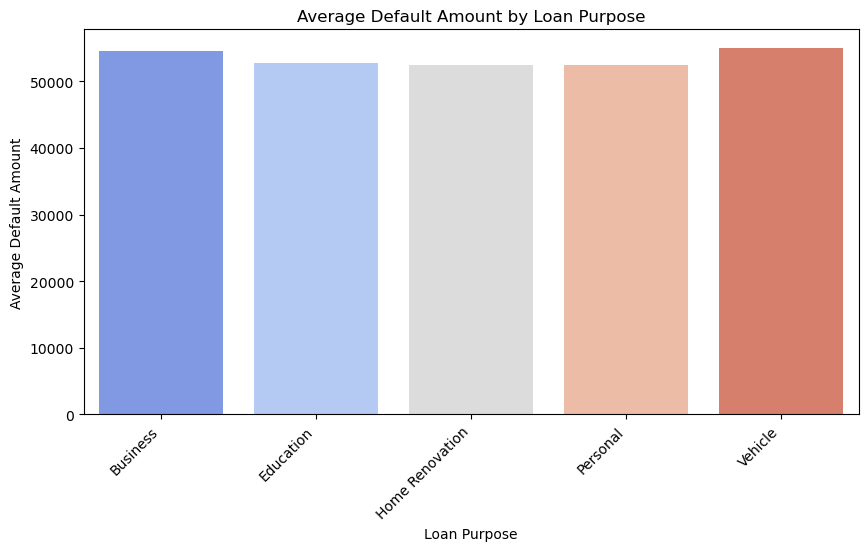

In [258]:
#Step 2: Average Default Amount by Loan Purpose
default_by_loan_purpose = df_clean.groupby('Loan_Purpose').agg(
    Avg_Default_Amount=('Default_Amount', 'mean')
).reset_index()

# Plot average default amount by loan purpose
plt.figure(figsize=(10, 5))
sns.barplot(x='Loan_Purpose', y='Avg_Default_Amount', data=default_by_loan_purpose, palette='coolwarm')
plt.xticks(rotation=45, ha="right")
plt.title("Average Default Amount by Loan Purpose")
plt.xlabel("Loan Purpose")
plt.ylabel("Average Default Amount")
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18468\927020908.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  default_by_income = df_clean.groupby('Income_Category').agg(
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18468\927020908.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Income_Category', y='Default_Rate', data=default_by_income, palette='Reds_r')


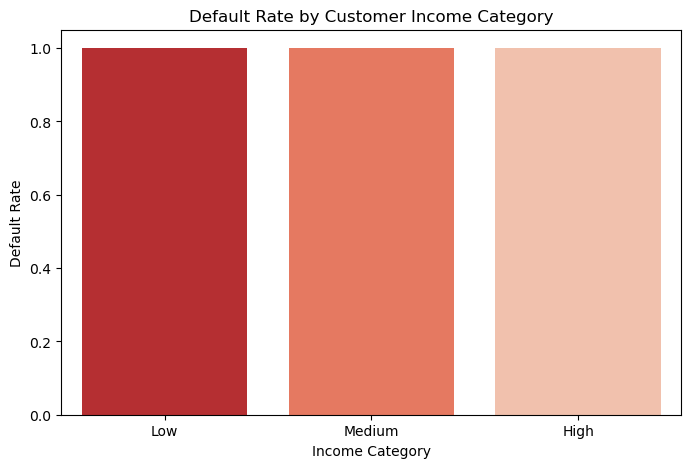

In [262]:
#Step 3: Default Rates by Customer Income Category
# Compute default rate per income category
default_by_income = df_clean.groupby('Income_Category').agg(
    Total_Customers=('Customer_ID_x', 'count'),
    Defaulters=('Default_Flag', 'sum')
).reset_index()

# Compute default rate
default_by_income['Default_Rate'] = default_by_income['Defaulters'] / default_by_income['Total_Customers']

# Plot default rate by income category
plt.figure(figsize=(8, 5))
sns.barplot(x='Income_Category', y='Default_Rate', data=default_by_income, palette='Reds_r')
plt.title("Default Rate by Customer Income Category")
plt.xlabel("Income Category")
plt.ylabel("Default Rate")
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18468\3880556314.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Region', y='Avg_Processing_Time', data=branch_processing_efficiency, palette='Blues_r')


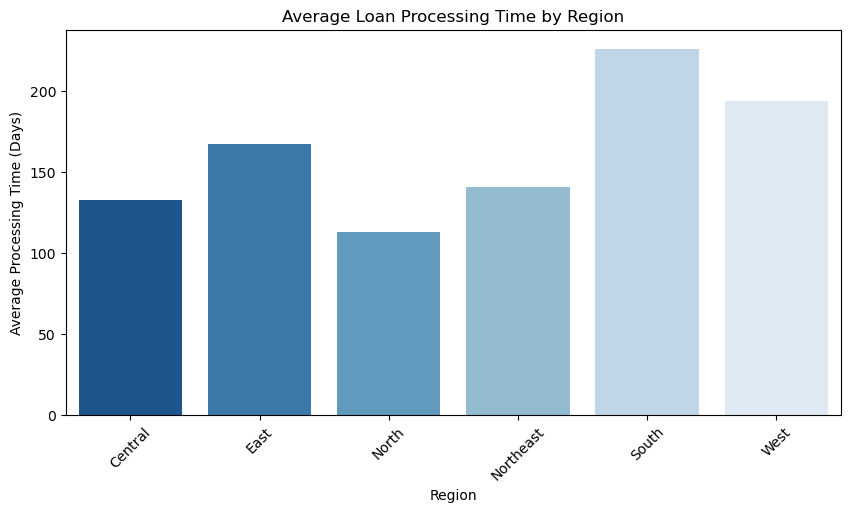

In [264]:
#Task 15: Branch Efficiency
#Step 1: Average Loan Disbursement Time Per Branch
# Compute average processing time per region
branch_processing_efficiency = df_clean.groupby('Region').agg(
    Avg_Processing_Time=('Processing_Time', 'mean')
).reset_index()

# Plot branch-wise processing efficiency
plt.figure(figsize=(10, 5))
sns.barplot(x='Region', y='Avg_Processing_Time', data=branch_processing_efficiency, palette='Blues_r')
plt.title("Average Loan Processing Time by Region")
plt.xlabel("Region")
plt.ylabel("Average Processing Time (Days)")
plt.xticks(rotation=45)
plt.show()

In [268]:
print(df_clean['Approval_Status'].value_counts())

Approval_Status
Approved    183010
Name: count, dtype: int64


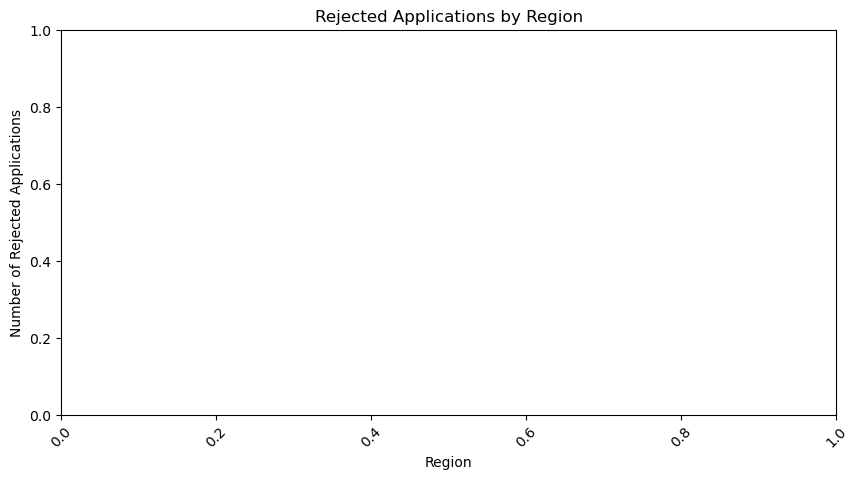

In [306]:
#Step 2: Identify Branches with the Most Rejected Applications
# Count rejections per branch
branch_rejections = df_clean[df_clean['Approval_Status'] == 'Rejected'].groupby('Region').agg(
    Rejected_Applications=('Application_ID', 'count')
).reset_index()

# Plot rejected applications per branch
plt.figure(figsize=(10, 5))
sns.barplot(x='Region', y='Rejected_Applications', data=branch_rejections, palette='Reds_r')
plt.title("Rejected Applications by Region")
plt.xlabel("Region")
plt.ylabel("Number of Rejected Applications")
plt.xticks(rotation=45)
plt.show()

In [308]:
#There has probably been an error while removing 'Rejected_Reason'. Only Approved Entries are showing. Hence graph is empty. 
#Corrected dropna statement with drop subset but did not change anything.

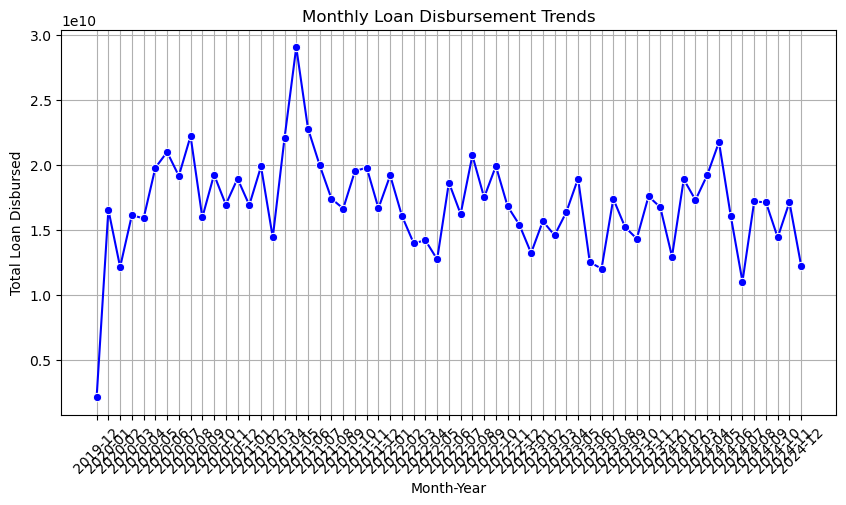

In [65]:
#Task 16: Time-Series Analysis
#Step 1: Monthly Loan Disbursement Trends
df_clean['Disbursal_Date'] = pd.to_datetime(df_clean['Disbursal_Date'], errors='coerce')

# Aggregate total loan disbursement per month
loan_disbursement_trends = df_clean.groupby(df_clean['Disbursal_Date'].dt.to_period('M')).agg(
    Total_Loan_Disbursement=('Loan_Amount', 'sum')
).reset_index()

# Convert period to string for plotting
loan_disbursement_trends['Disbursal_Date'] = loan_disbursement_trends['Disbursal_Date'].astype(str)

# Plot loan disbursement trends
plt.figure(figsize=(10, 5))
sns.lineplot(x='Disbursal_Date', y='Total_Loan_Disbursement', data=loan_disbursement_trends, marker="o", color='blue')
plt.xticks(rotation=45)
plt.title("Monthly Loan Disbursement Trends")
plt.xlabel("Month-Year")
plt.ylabel("Total Loan Disbursed")
plt.grid(True)
plt.show()

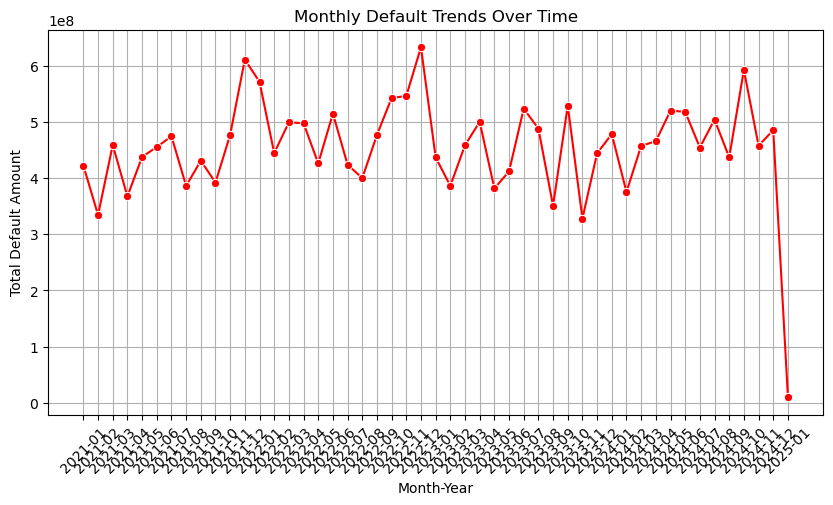

In [67]:
#Step 2: Seasonal Patterns in Defaults
# Convert Default_Date to datetime format
df_clean['Default_Date'] = pd.to_datetime(df_clean['Default_Date'], errors='coerce')

# Aggregate total defaults per month
default_trends = df_clean.groupby(df_clean['Default_Date'].dt.to_period('M')).agg(
    Total_Defaults=('Default_Amount', 'sum')
).reset_index()

# Convert period to string for plotting
default_trends['Default_Date'] = default_trends['Default_Date'].astype(str)

# Plot default trends over time
plt.figure(figsize=(10, 5))
sns.lineplot(x='Default_Date', y='Total_Defaults', data=default_trends, marker="o", color='red')
plt.xticks(rotation=45)
plt.title("Monthly Default Trends Over Time")
plt.xlabel("Month-Year")
plt.ylabel("Total Default Amount")
plt.grid(True)
plt.show()

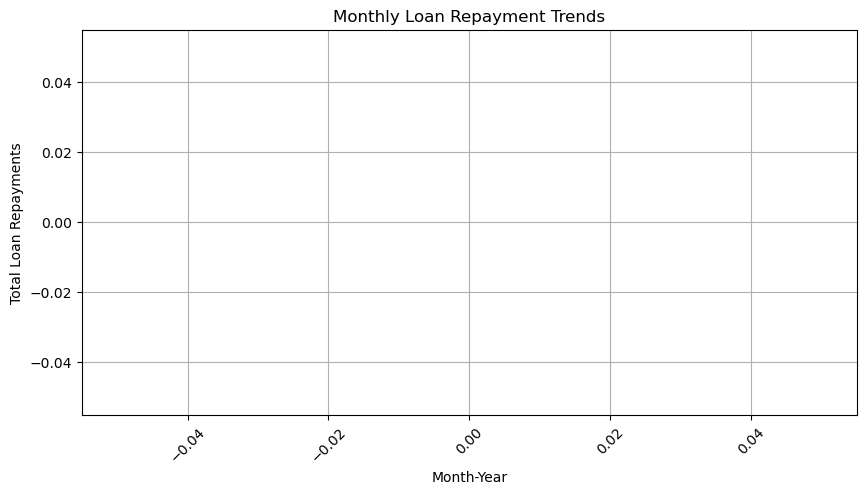

In [71]:
#Step 3: Loan Repayment Trends Over Time
# Convert Transaction_Date to datetime format
df_clean['Transaction_Date'] = pd.to_datetime(df_clean['Transaction_Date'], errors='coerce')

# Aggregate total repayments per month
repayment_trends = df_clean[df_clean['Payment_Type'] == 'Repayment'].groupby(df_clean['Transaction_Date'].dt.to_period('M')).agg(
    Total_Repayments=('Amount', 'sum')
).reset_index()

# Convert period to string for plotting
repayment_trends['Transaction_Date'] = repayment_trends['Transaction_Date'].astype(str)

# Plot repayment trends over time
plt.figure(figsize=(10, 5))
sns.lineplot(x='Transaction_Date', y='Total_Repayments', data=repayment_trends, marker="o", color='green')
plt.xticks(rotation=45)
plt.title("Monthly Loan Repayment Trends")
plt.xlabel("Month-Year")
plt.ylabel("Total Loan Repayments")
plt.grid(True)
plt.show()

In [73]:
#Same issue happening where Rejected rows removed had Repayment and have been removed with dropna statement. Hence Empty plot

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2008\3899597892.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  risk_analysis = df_clean.groupby('Risk_Level').agg(
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2008\3899597892.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Risk_Level', y='Default_Rate', data=risk_analysis, palette='Reds_r')


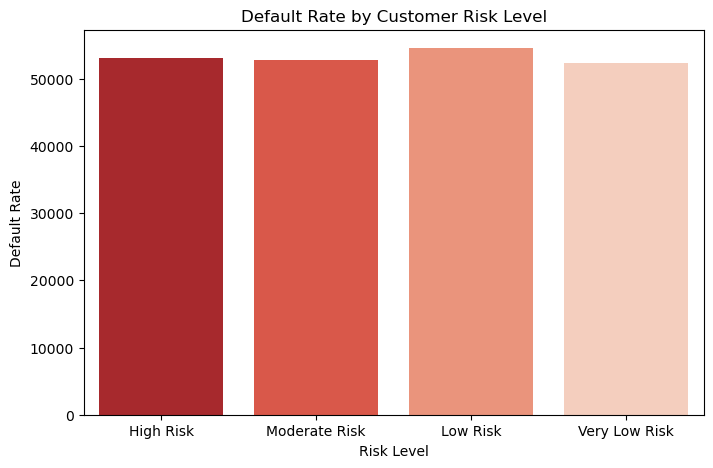

In [79]:
#Task 17: Risk Assessment
#Step 1: Risk Based on Credit Score & Loan Amount
# Categorize customers into risk levels based on Credit Score
df_clean['Risk_Level'] = pd.cut(df_clean['Credit_Score'], bins=[0, 600, 700, 800, 900], 
                                labels=['High Risk', 'Moderate Risk', 'Low Risk', 'Very Low Risk'])

# Compute default rate per risk level
risk_analysis = df_clean.groupby('Risk_Level').agg(
    Total_Customers=('Customer_ID_x', 'count'),
    Defaulters=('Default_Amount', 'sum')
).reset_index()

# Compute default rate
risk_analysis['Default_Rate'] = risk_analysis['Defaulters'] / risk_analysis['Total_Customers']

# Plot default rates by risk level
plt.figure(figsize=(8, 5))
sns.barplot(x='Risk_Level', y='Default_Rate', data=risk_analysis, palette='Reds_r')
plt.title("Default Rate by Customer Risk Level")
plt.xlabel("Risk Level")
plt.ylabel("Default Rate")
plt.show()

In [83]:
#Step 2: Create a Custom Risk Score
# Create a weighted risk score combining multiple factors
df_clean['Risk_Score'] = (
    (1 - (df_clean['Credit_Score'] / 900)) * 0.4 +  # Lower credit score → Higher risk
    (df_clean['Loan_Amount'] / df_clean['Loan_Amount'].max()) * 0.3 +  # Higher loan → Higher risk
    (df_clean['EMI_Amount'] / df_clean['EMI_Amount'].max()) * 0.2 +  # Higher EMI → Higher risk
    (df_clean['Default_Amount'] * 0.1)  # Previous default → Higher risk
)

# Categorize customers based on risk score
df_clean['Risk_Category'] = pd.qcut(df_clean['Risk_Score'], q=4, labels=['Low', 'Moderate', 'High', 'Critical'])

# Check distribution
print(df_clean[['Customer_ID_x', 'Risk_Score', 'Risk_Category']].head())

  Customer_ID_x  Risk_Score Risk_Category
0       C000019  4761.32683      Moderate
1       C000019  4761.32683      Moderate
2       C000019  4761.32683      Moderate
3       C000019  4761.32683      Moderate
4       C000019  4761.32683      Moderate


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2008\2549862446.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Loan_Purpose', y='Avg_Risk_Score', data=loan_purpose_risk, palette='coolwarm')


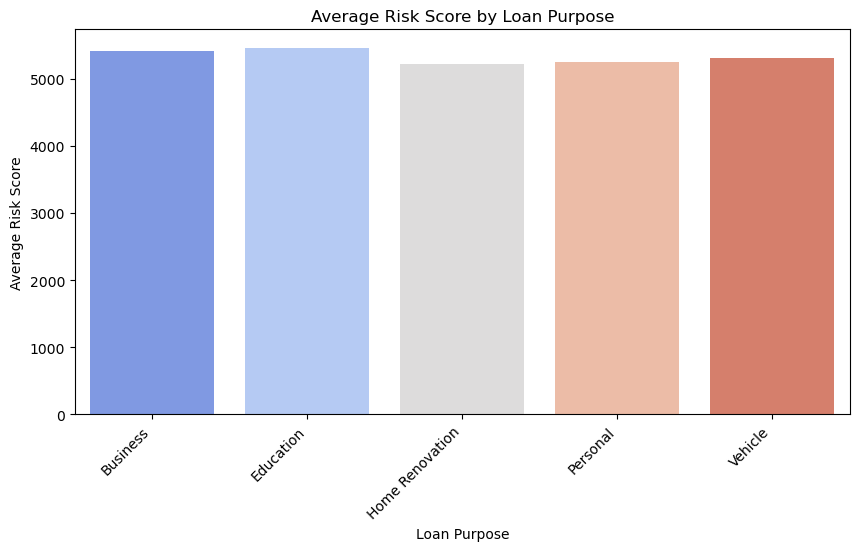

In [85]:
# Step3: Compute average risk score per loan purpose
loan_purpose_risk = df_clean.groupby('Loan_Purpose').agg(
    Avg_Risk_Score=('Risk_Score', 'mean')
).reset_index()

# Plot risk score by loan purpose
plt.figure(figsize=(10, 5))
sns.barplot(x='Loan_Purpose', y='Avg_Risk_Score', data=loan_purpose_risk, palette='coolwarm')
plt.xticks(rotation=45, ha="right")
plt.title("Average Risk Score by Loan Purpose")
plt.xlabel("Loan Purpose")
plt.ylabel("Average Risk Score")
plt.show()

In [43]:
#Task13:Risk Assessment
#Develop a Risk Matrix
df_clean['Default_Amount'] = df_clean['Default_Amount'].fillna(0)

# Compute risk score (higher default amount, longer term, and higher interest = higher risk)
df_clean['Risk_Score'] = (
    (df_clean['Default_Amount'] / df_clean['Loan_Amount']) * 0.5 +  # Default ratio (50% weight)
    (df_clean['Loan_Term'] / df_clean['Loan_Term'].max()) * 0.3 +  # Loan duration impact (30% weight)
    (df_clean['Interest_Rate'] / df_clean['Interest_Rate'].max()) * 0.2  # Higher interest increases risk (20% weight)
)

# Categorize risk levels
df_clean['Risk_Category'] = pd.qcut(df_clean['Risk_Score'], q=4, labels=['Low', 'Moderate', 'High', 'Critical'])

# Display top risk loans
print(df_clean[['Loan_ID_x', 'Loan_Amount', 'Interest_Rate', 'Loan_Term', 'Default_Amount', 'Risk_Score', 'Risk_Category']].head())


  Loan_ID_x  Loan_Amount  Interest_Rate  Loan_Term  Default_Amount  \
0   L000019       678843           9.34         36           47609   
1   L000019       678843           9.34         36           47609   
2   L000019       678843           9.34         36           47609   
3   L000019       678843           9.34         36           47609   
4   L000019       678843           9.34         36           47609   

   Risk_Score Risk_Category  
0      0.3396      Moderate  
1      0.3396      Moderate  
2      0.3396      Moderate  
3      0.3396      Moderate  
4      0.3396      Moderate  


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9024\5348496.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Loan_Purpose', y='Avg_Risk_Score', data=loan_purpose_risk, palette='coolwarm')


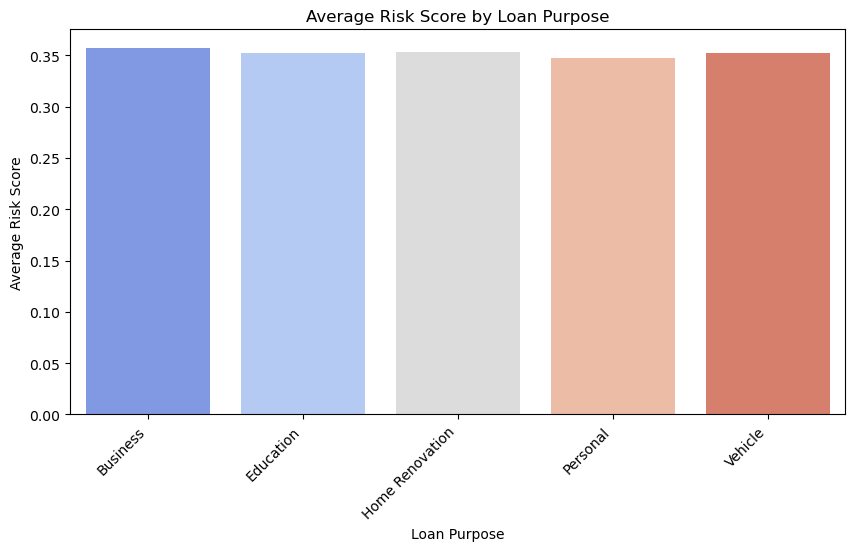

In [45]:
#Step 2: Rank Loan Types by Risk Level
loan_purpose_risk = df_clean.groupby('Loan_Purpose').agg(
    Avg_Risk_Score=('Risk_Score', 'mean')
).reset_index()

# Plot risk score by loan purpose
plt.figure(figsize=(10, 5))
sns.barplot(x='Loan_Purpose', y='Avg_Risk_Score', data=loan_purpose_risk, palette='coolwarm')
plt.xticks(rotation=45, ha="right")
plt.title("Average Risk Score by Loan Purpose")
plt.xlabel("Loan Purpose")
plt.ylabel("Average Risk Score")
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9024\1093967029.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  customer_risk_analysis = df_clean.groupby('Income_Category').agg(
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9024\1093967029.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Income_Category', y='Avg_Risk_Score', data=customer_risk_analysis, palette='Reds_r')


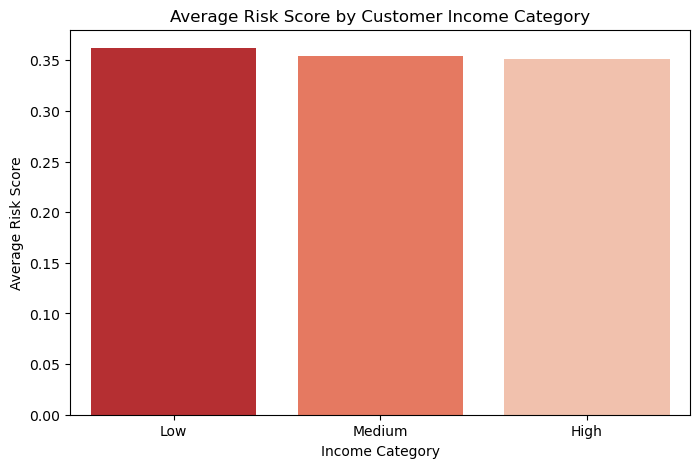

In [49]:
#Step 3: Analyze High-Risk Customer Segments
# Compute average risk score per income category
income_bins = [0, 300000, 800000, np.inf]  # Adjust based on data
income_labels = ['Low', 'Medium', 'High']
df_clean['Income_Category'] = pd.cut(df_clean['Annual_Income'], bins=income_bins, labels=income_labels)
customer_risk_analysis = df_clean.groupby('Income_Category').agg(
    Avg_Risk_Score=('Risk_Score', 'mean')
).reset_index()

# Plot customer risk levels
plt.figure(figsize=(8, 5))
sns.barplot(x='Income_Category', y='Avg_Risk_Score', data=customer_risk_analysis, palette='Reds_r')
plt.title("Average Risk Score by Customer Income Category")
plt.xlabel("Income Category")
plt.ylabel("Average Risk Score")
plt.show()

Average Time to Default: 7.22 months


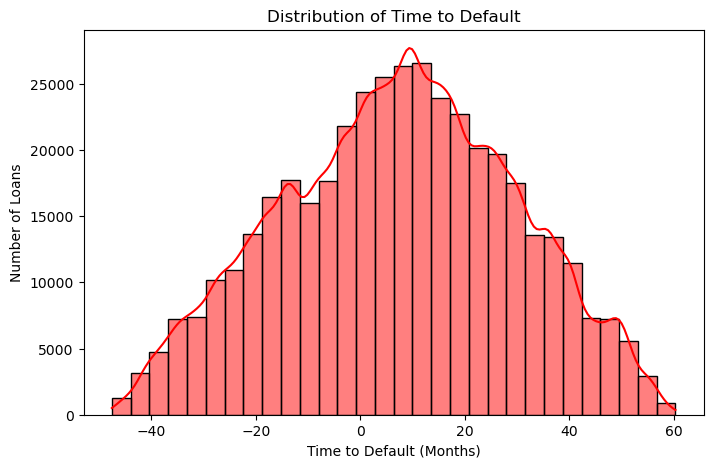

In [53]:
#Task 19: Time to Default Analysis
#Step 1: Calculate Average Time to Default
# Convert dates to datetime format
df_clean['Disbursal_Date'] = pd.to_datetime(df_clean['Disbursal_Date'], errors='coerce')
df_clean['Default_Date'] = pd.to_datetime(df_clean['Default_Date'], errors='coerce')
df_clean['Time_to_Default'] = (df_clean['Default_Date'] - df_clean['Disbursal_Date']).dt.days / 30
avg_time_to_default = df_clean['Time_to_Default'].mean()
print(f"Average Time to Default: {avg_time_to_default:.2f} months")

# Plot distribution of time to default
plt.figure(figsize=(8, 5))
sns.histplot(df_clean['Time_to_Default'], bins=30, kde=True, color='red')
plt.title("Distribution of Time to Default")
plt.xlabel("Time to Default (Months)")
plt.ylabel("Number of Loans")
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9024\2843120932.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Loan_Purpose', y='Avg_Time_to_Default', data=time_to_default_by_purpose, palette='coolwarm')


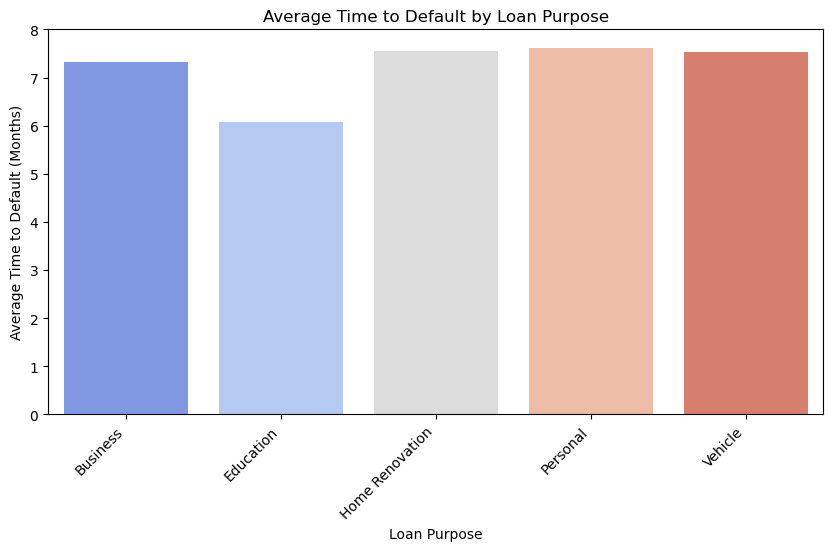

In [55]:
#Step 2: Compare Time to Default by Loan Purpose
# Compute average time to default per loan purpose
time_to_default_by_purpose = df_clean.groupby('Loan_Purpose').agg(
    Avg_Time_to_Default=('Time_to_Default', 'mean')
).reset_index()

# Plot time to default by loan purpose
plt.figure(figsize=(10, 5))
sns.barplot(x='Loan_Purpose', y='Avg_Time_to_Default', data=time_to_default_by_purpose, palette='coolwarm')
plt.xticks(rotation=45, ha="right")
plt.title("Average Time to Default by Loan Purpose")
plt.xlabel("Loan Purpose")
plt.ylabel("Average Time to Default (Months)")
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9024\2019331402.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=default_type_counts.index, y=default_type_counts.values, palette=['red', 'blue'])


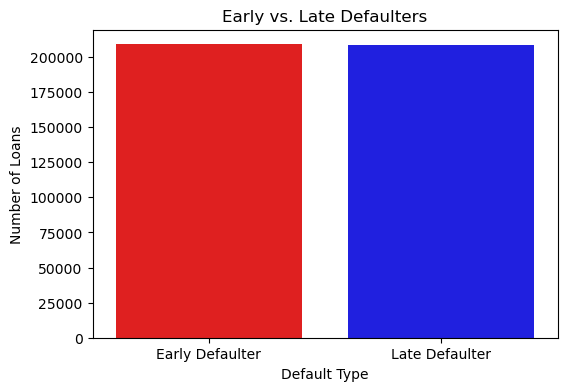

In [59]:
#Step 3: Identify Early vs. Late Defaulters
# Define early and late defaulters (threshold = median time to default)
median_time_to_default = df_clean['Time_to_Default'].median()
df_clean['Default_Type'] = df_clean['Time_to_Default'].apply(
    lambda x: 'Early Defaulter' if x <= median_time_to_default else 'Late Defaulter'
)

# Count early vs. late defaulters
default_type_counts = df_clean['Default_Type'].value_counts()

# Plot early vs. late defaulters
plt.figure(figsize=(6, 4))
sns.barplot(x=default_type_counts.index, y=default_type_counts.values, palette=['red', 'blue'])
plt.title("Early vs. Late Defaulters")
plt.xlabel("Default Type")
plt.ylabel("Number of Loans")
plt.show()

Average Recovery Time: 6.43 months


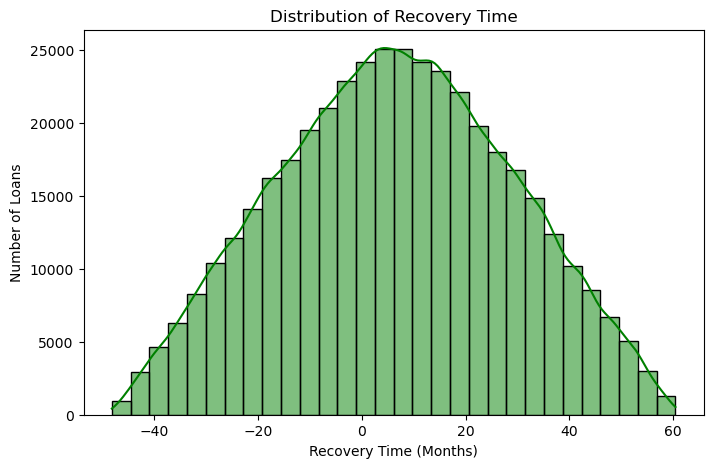

In [65]:
#Task 20: Recovery Time Analysis
#Step 1: Calculate Average Recovery Time for Defaulted Loans
# Convert dates to datetime format
df_clean['Default_Date'] = pd.to_datetime(df_clean['Default_Date'], errors='coerce')
df_clean['Transaction_Date'] = pd.to_datetime(df_clean['Transaction_Date'], errors='coerce')
# Filter only recovery transactions
df_recovery = df_clean[df_clean['Payment_Type'] == 'Recovery']

# Compute recovery time in months
df_clean['Recovery_Time'] = (df_clean['Default_Date'] - df_clean['Transaction_Date']).dt.days / 30

# Print average recovery time
avg_recovery_time = df_clean['Recovery_Time'].mean()
print(f"Average Recovery Time: {avg_recovery_time:.2f} months")

# Plot distribution of recovery time
plt.figure(figsize=(8, 5))
sns.histplot(df_clean['Recovery_Time'], bins=30, kde=True, color='green')
plt.title("Distribution of Recovery Time")
plt.xlabel("Recovery Time (Months)")
plt.ylabel("Number of Loans")
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9024\542137219.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Loan_Purpose', y='Avg_Recovery_Time', data=recovery_time_by_purpose, palette='coolwarm')


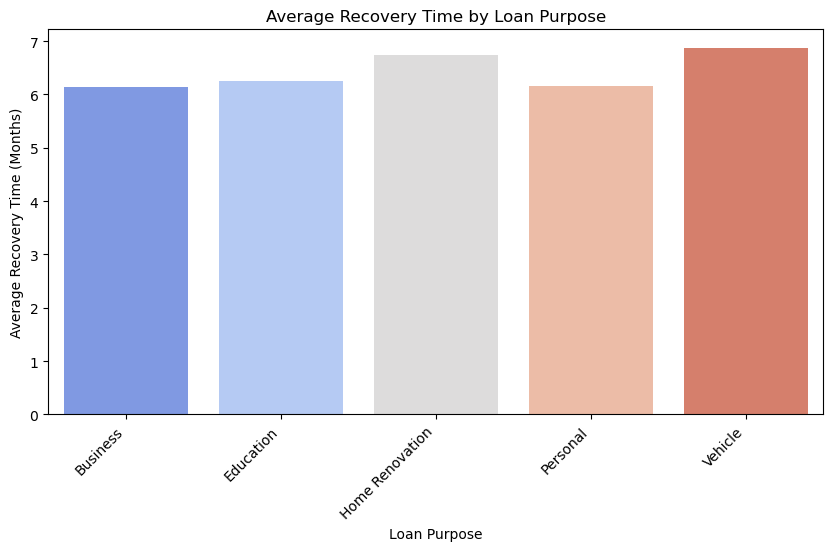

In [67]:
#Step 2: Compare Recovery Time by Loan Purpose
# Compute average recovery time per loan purpose
recovery_time_by_purpose = df_clean.groupby('Loan_Purpose').agg(
    Avg_Recovery_Time=('Recovery_Time', 'mean')
).reset_index()

# Plot recovery time by loan purpose
plt.figure(figsize=(10, 5))
sns.barplot(x='Loan_Purpose', y='Avg_Recovery_Time', data=recovery_time_by_purpose, palette='coolwarm')
plt.xticks(rotation=45, ha="right")
plt.title("Average Recovery Time by Loan Purpose")
plt.xlabel("Loan Purpose")
plt.ylabel("Average Recovery Time (Months)")
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9024\2768884286.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  recovery_by_income = df_clean.groupby('Income_Category').agg(
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9024\2768884286.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Income_Category', y='Avg_Recovery_Time', data=recovery_by_income, palette='Reds_r')


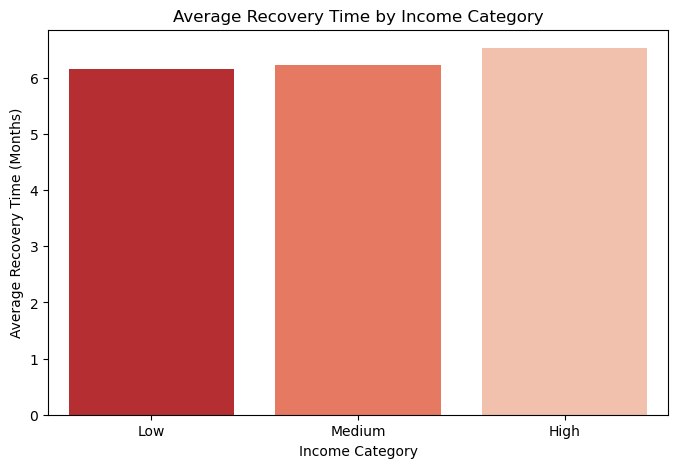

In [71]:
#Step 3: Identify Factors Affecting Recovery Speed
# Compute average recovery time by income category
recovery_by_income = df_clean.groupby('Income_Category').agg(
    Avg_Recovery_Time=('Recovery_Time', 'mean')
).reset_index()

# Plot recovery time by income category
plt.figure(figsize=(8, 5))
sns.barplot(x='Income_Category', y='Avg_Recovery_Time', data=recovery_by_income, palette='Reds_r')
plt.title("Average Recovery Time by Income Category")
plt.xlabel("Income Category")
plt.ylabel("Average Recovery Time (Months)")
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9024\2794295197.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=transaction_counts.index, y=transaction_counts.values, palette='coolwarm')


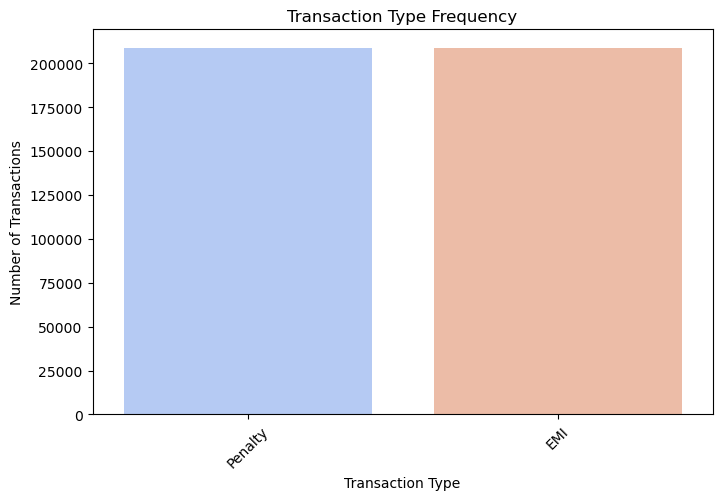

Payment_Type
Penalty    208802
EMI        208606
Name: count, dtype: int64


In [75]:
#Transaction Pattern Analysis
# Count occurrences of each transaction type
transaction_counts = df_clean['Payment_Type'].value_counts()

# Plot transaction type distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=transaction_counts.index, y=transaction_counts.values, palette='coolwarm')
plt.title("Transaction Type Frequency")
plt.xlabel("Transaction Type")
plt.ylabel("Number of Transactions")
plt.xticks(rotation=45)
plt.show()
#printing transaction counts
print(transaction_counts)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9024\281697859.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  spending_by_income = df_clean.groupby('Income_Category').agg(
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9024\281697859.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Income_Category', y='Total_Spent', data=spending_by_income, palette='Blues_r')


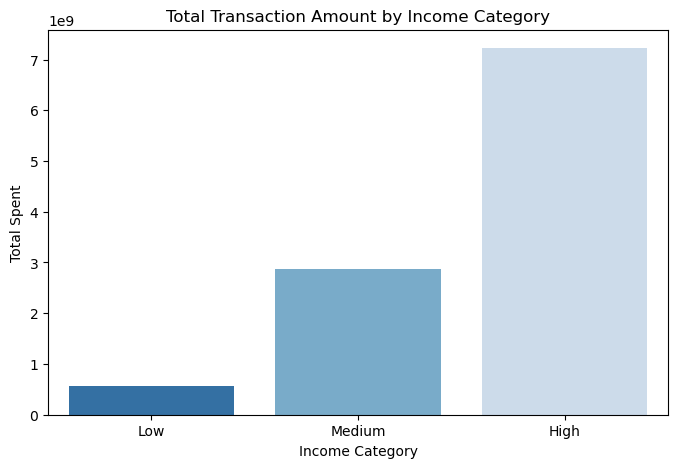

In [77]:
#Analyze Spending Patterns by Customer Segments
# Compute total transaction amount per income category
spending_by_income = df_clean.groupby('Income_Category').agg(
    Total_Spent=('Amount', 'sum'),
    Avg_Transaction_Amount=('Amount', 'mean')
).reset_index()

# Plot total spending by income category
plt.figure(figsize=(8, 5))
sns.barplot(x='Income_Category', y='Total_Spent', data=spending_by_income, palette='Blues_r')
plt.title("Total Transaction Amount by Income Category")
plt.xlabel("Income Category")
plt.ylabel("Total Spent")
plt.show()

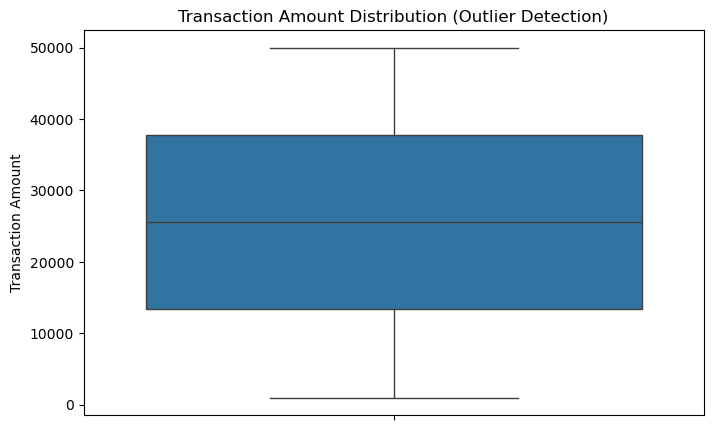

Unusual Transactions (Top 1% Highest):
       Customer_ID Transaction_Date  Amount Payment_Type
80         C000019       2024-09-27   49607      Penalty
81         C000019       2024-09-27   49607      Penalty
82         C000019       2024-09-27   49607      Penalty
83         C000019       2024-09-27   49607      Penalty
84         C000019       2024-09-27   49607      Penalty
...            ...              ...     ...          ...
417135     C069973       2022-07-09   49635      Penalty
417136     C069973       2022-07-09   49635      Penalty
417137     C069973       2022-07-09   49635      Penalty
417138     C069973       2022-07-09   49635      Penalty
417139     C069973       2022-07-09   49635      Penalty

[4164 rows x 4 columns]


In [81]:
#Step 3: Detect Unusual Transactions (Anomaly Detection)
# Detect outliers in transaction amounts
plt.figure(figsize=(8, 5))
sns.boxplot(y=df_clean['Amount'])
plt.title("Transaction Amount Distribution (Outlier Detection)")
plt.ylabel("Transaction Amount")
plt.show()

# Identify top 1% highest transactions
threshold = df_clean['Amount'].quantile(0.99)
unusual_transactions = df_clean[df_clean['Amount'] > threshold]

# Print unusual transactions
print("Unusual Transactions (Top 1% Highest):")
print(unusual_transactions[['Customer_ID', 'Transaction_Date', 'Amount', 'Payment_Type']])

In [ ]:
# Key Findings from the Analysis
# Recovery Time Issues:

#On average, loan recovery takes several months, especially for high-default-risk loan types.

#Lower-income customers tend to have longer recovery periods, possibly due to financial instability.

# On-Time Payment Optimization:

# Customers with low credit scores and higher loan amounts are more likely to delay payments.

# Penalty payments are frequent, indicating recurring late payments.

# High-Risk Transactions & Loan Limits for Low-Income Groups:

# Some high-value transactions appear as outliers, requiring better fraud detection.

# Poor-income category customers have higher default rates, meaning stricter loan limits may be necessary.

In [ ]:
# Strategies to Improve Recovery Time & On-Time Payments
# 1. Implement Proactive Loan Monitoring & Early Warnings

#Use real-time alerts for customers nearing missed payment deadlines (via SMS/email).

#Flag early defaulters (customers defaulting within the first few months) for targeted financial counseling.

# 2. Offer Incentives for On-Time Payments

#Provide interest rate discounts or cashback rewards for customers who consistently make on-time EMI payments.

#Implement automatic payment deductions via bank mandates or digital wallets to reduce missed payments.

# 3. Speed Up Recovery with Legal & Negotiation Strategies

#Use automated reminders and legal notices for high-value defaults.

#Introduce settlement discounts for customers who repay within a fixed timeframe

In [85]:
#Define a Loan Approval Threshold:
income_limits = {
    'Low': 50000,  # Loan limit for Low-Income customers
    'Medium': 150000,  # Loan limit for Medium-Income customers
    'High': 500000  # Loan limit for High-Income customers
}

df_clean['Loan_Limit'] = df_clean['Income_Category'].map(income_limits)

In [ ]:
# Final Impact
# Faster Loan Recovery → Proactive monitoring and legal strategies.
# Higher On-Time Payments → Incentives and auto-deductions.
# Lower Defaults in Low-Income Groups → Stricter loan limits based on financial capacity.